<a href="https://colab.research.google.com/github/mobius29er/youtubeExtractor/blob/main/YoutubeExtractorAnalysisGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question
Can the success of a YouTube video, measured by normalized viewership and a custom-developed engagement score, be predicted and replicated by analyzing patterns in its metadata, thumbnail and video structure?
## Expected Data Sources
The data will be sourced from the public-facing pages of approximately 1,000 YouTube videos from 25 creators across five distinct genres (Challenge/Stunts, Christian, Education/Science, Gaming, and Kids/Family). This will include scraping video metadata (titles, tags, views, likes, comments, duration, publication date), channel subscriber counts, thumbnail images, and the first 30 seconds of video transcripts to analyze the "hook" (if time allows).
## Expected Techniques
The analysis will use a combination of unsupervised and supervised learning techniques:
- Pandas: For comprehensive data cleaning, merging, and feature engineering, including the calculation of a custom "Retention Quality Score" based on like/view ratios, comment/view ratios, and sentiment analysis of comments.
- Unsupervised Learning (like K-Means Clustering & PCA): K-Means will be used to group videos based on shared characteristics in their thumbnails, hooks, and engagement profiles, thereby identifying distinct "types" of successful content. PCA will help reduce the dimensionality of the feature set and identify the most influential underlying factors.
- Supervised Learning (like Regression Model): As a complementary approach, a regression model (such as Linear Regression or Gradient Boosting) will be trained to predict a video's potential view count based on its pre-upload features (title characteristics, thumbnail properties, hook analysis). This will help validate the findings from the unsupervised models and provide a direct predictive tool.
##Expected Results
I expect to identify and define several distinct, replicable "success signatures" or patterns that correlate with high viewership and engagement. The analysis should reveal that top-performing videos, regardless of genre, share common, quantifiable characteristics in their titles, thumbnail compositions, and introductory hooks. The expected outcome is a dual framework: one that classifies videos into performance clusters and another that predicts potential viewership, providing data-driven recommendations for optimization.
##Importance of This Question
Countless creators invest significant time and resources into YouTube with inconsistent results, often relying on intuition rather than data. This research aims to demystify viral success by translating the implicit strategies of top creators into an explicit, actionable framework. Answering this question will provide aspiring and established creators with a data-driven guide to content strategy, helping them optimize their videos for better performance, leading to increased viewership, audience growth, and higher potential earnings. The benefit extends beyond individual creators, offering a clearer understanding of what captures audience attention in the digital age, which is invaluable for marketers, educators, and entertainers alike. By providing a "formula" for success, this analysis can help level the playing field and empower smaller creators to compete more

## Data Needed:
### Videos
1,000 public YouTube videos breakdown (prioritizing videos 90 days or older):
### 5 genres:
- Challenge/Stunts
- Christian
- Education/Science
- Gaming
- Kids/Family
### 5 creators per genre
### 40 videos per creator
### 10 of the top videos by view count
### 10 of the bottom videos by view count
### 20 randomly selected excluding the top and bottom 10% of videos

## Basic metadata
- title - could impact the CTR and impressions
-tags - could impact impressions
- views - provides performance
- likes - indicator for retention
- comments -  indicator for retention
- duration - may impact retention
- publish date - to check to ensure video has aged enough to normalize


### Other Metrics:
Channel subscriber counts to normalize performance across creators to calculate

## Retention Quality Score
Retention Quality Score - Needed since we don't have access to analytics from each Creator to see viewer retention
- Like Ratio - Likes/Views - 30%
- Comment Ratio - Comments/Views - 20%
- Views per subscribers - Views/Subscribers - 25%
- Sentiment Score: Average positive/neutral/negative of top 100 comments - 15%
- Comment Depth: Length of Comments and any timestamps (indicating viewer retention especially for later time stamps) - 10%
- Thumbnail images - Impacts CTR (click through Rates)
- Title -

### RQS can be broken out into two seperate Metrics:
Engagement Metric (CTR (click through rate) Alternative):
- Thumbnail Images + Title + Views/Subscribers

Retention Metric (AVD (average view duration) - alternative):
- Like Ratio - likes/views
- Comment Ratio - Comments/views
- Comment Depth - Length of Comments and any timestamps (indicating viewer retention especially for later time stamps)

So RQS can rank the video on how it will perform overall, engagement metric will show how many people will click on it, and retention metric will show how veiwers will react to the video.  



## Web Application Development Plan

The goal is to create a website using the trained machine learning models where a user can input their **video title**, **thumbnail**, and **subscriber count**, and the system will output:

- The **predicted view count**
- The **predicted CTR (Click-Through Rate)**
- A list of **recommended tags** based on similarity and feature importance

This application operationalizes the models into an interactive platform for creators, providing actionable data-driven insights.  
Below is the structured plan for development.



### 1. Review and Finalize Models
- Select the best-performing models for:
  - **Raw views prediction:** likely the *Gradient Boosting Regressor* trained on log-transformed views.
  - **Views per subscriber prediction.**
- Evaluate whether a separate model is required for CTR, or if *views per subscriber* can act as a proxy.
- Confirm feature stability and reproducibility for deployment.



### 2. Model Saving
- Save the following components for production use:
  - The trained **views predictor** and **views per subscriber (or CTR) predictor**.
  - The **StandardScaler** used for feature normalization.
- Store models as serialized `.joblib` or `.pkl` files.
- Load these models dynamically in the web application to avoid retraining during runtime.



### 3. Feature Processing Module
Develop a dedicated Python module to encapsulate all feature engineering steps required for inference.

**Inputs:**
- Video title (string)
- Thumbnail image (JPEG/PNG)
- Subscriber count (integer)

**Outputs:**
- Model-ready numerical feature vector.

**Processing Steps:**
1. Clean and tokenize text input.
2. Generate **text embeddings** for the title and thumbnail text.
3. Load and analyze the **thumbnail image**:
   - Extract average RGB and dominant colors.
   - Detect presence and size of faces.
4. Compute **derived engagement metrics** if applicable.
5. Apply scaling using the saved `StandardScaler`.



### 4. Tag Recommendation Logic
- Implement logic for generating **tag recommendations** using either:
  1. **Similarity search** based on embeddings:
     - Find similar videos in the training dataset.
     - Suggest the most frequently used tags among their high-performing counterparts.
  2. **Feature importance mapping**:
     - Use SHAP or permutation importance to identify tags and keywords that most strongly correlate with high RQS and view performance.



### 5. Web Application Framework
- Select a backend framework such as:
  - **Flask** (lightweight, modular, ideal for rapid prototyping)
  - **Django** (more structured, suitable for scaling)
  - **FastAPI** (modern, high-performance, ideal for AI/ML)
- Define REST API endpoints for:
  - Model prediction
  - Tag recommendation
  - Data logging and monitoring



### 6. User Interface (UI) Design
Design the interface to be clean and intuitive with the following input fields:

- **Video Title** – text input box  
- **Thumbnail Upload** – drag-and-drop image area  
- **Subscriber Count** – numeric input field  
- **Genre Selection** – dropdown filter  

The results page should display:

- Predicted **View Count**
- Predicted **CTR or Views per Subscriber**
- Recommended **Tags**

Optional: Include data visualization elements (charts or color palettes) for thumbnail analysis.



### 7. Backend Development
1. Set up the web server and configure routes.  
2. Load saved models and the StandardScaler.  
3. Receive and validate input from the UI.  
4. Pass input through the **Feature Processing Module**.  
5. Run model inference for:
   - Predicted views
   - Predicted CTR or normalized views per subscriber  
6. Execute **Tag Recommendation Logic**.  
7. Format and return results to the frontend via JSON.



### 8. Frontend Development
- Build the front end using **HTML**, **CSS**, and **JavaScript** (or a framework such as React or Vue if desired).  
- Handle user input events, file uploads, and API communication.  
- Display prediction results dynamically with clear visual feedback.



### 9. Integration
- Connect frontend and backend layers through REST endpoints.  
- Verify data transfer consistency and latency performance.  
- Ensure correct serialization and deserialization of input/output data.



### 10. Testing
Conduct comprehensive testing across multiple dimensions:
- **Unit testing** for model, scaler, and feature pipeline.  
- **Integration testing** for end-to-end prediction flows.  
- **User testing** to validate clarity, usability, and response accuracy.



### 11. Deployment
- Deploy the web application on a scalable platform such as:
  - **Railway**, **Render**, or **Heroku** for lightweight deployments.  
  - **AWS**, **Azure**, or **Google Cloud** for production-grade scalability.  
- Configure environment variables, model paths, and security layers (HTTPS, API keys).  
- Enable continuous deployment and logging.



### 12. Monitoring and Continuous Improvement
- Set up monitoring tools for:
  - API uptime and response latency  
  - Model drift and accuracy over time  
  - User engagement metrics within the app  
- Collect user feedback to refine tag recommendations and improve prediction reliability.



### 13. Completion
Once all systems are integrated and tested:

✅ **The web application is live**, providing creators with:  
- Accurate performance predictions before publishing.  
- Actionable tag recommendations.  
- A new data-driven framework for optimizing video success on YouTube.


# 1. Data Loading and Initial Exploration

* **Objective**: Load the raw data from a JSON file and transform it into a structured pandas DataFrame for easier manipulation.
* **Code**: These cells read the JSON file, normalize the nested 'data' column to extract channel and video information, and then specifically extract video details into a separate DataFrame (`videos_df`).
* **Parameters**: The primary parameter is the path to the JSON file: `/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json`.


In [ ]:
from google.colab import drive

# Step 1: Unmount the drive to clear the directory
drive.flush_and_unmount()
print('All changes made in this session have been saved.')

# Step 2: Mount the drive again
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
All changes made in this session have been saved.


ValueError: Mountpoint must not already contain files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Load the data from the JSON file
df = pd.read_json('/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json')

# Display the first few rows of the DataFrame and its info to understand the structure
display(df.head())
display(df.info())

,extraction_date,extraction_type,transcript_note,channels_processed,videos_selected,quota_used,data,metadata
VeggieTales Official,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,{'channel_info': {'name': 'VeggieTales Officia...,NaN
Miss Honey Bear - Speech Therapist - Read Aloud,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,{'channel_info': {'name': 'Miss Honey Bear - S...,NaN
MrBeast,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'MrBeast', 'handle':...",NaN
Zach King,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'Zach King', 'handle...",NaN
Hangtime,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'Hangtime', 'handle'...",NaN


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, VeggieTales Official to description
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   extraction_date     31 non-null     object
 1   extraction_type     31 non-null     object
 2   transcript_note     31 non-null     object
 3   channels_processed  31 non-null     int64 
 4   videos_selected     31 non-null     int64 
 5   quota_used          31 non-null     int64 
 6   data                25 non-null     object
 7   metadata            6 non-null      object
dtypes: int64(3), object(5)
memory usage: 2.2+ KB


None

In [11]:
# Normalize the 'data' column
data_normalized = pd.json_normalize(df['data'])

# Display the first few rows of the normalized data to understand its structure
display(data_normalized.head())
display(data_normalized.info())

,genre,videos,channel_info.name,channel_info.handle,channel_info.subs,channel_info.global_tier,channel_info.genre_tier,channel_info.channel_id,channel_data.channel_id,channel_data.handle,...,channel_data.video_count,channel_data.view_count,channel_data.thumbnail_url,channel_data.uploads_playlist_id,selection_result.selected_videos,selection_result.selection_method,selection_result.total_selected,selection_result.breakdown.top_performers,selection_result.breakdown.bottom_performers,selection_result.breakdown.random_sample
0,kids_family,"[{'video_id': 'LtHr7gluh08', 'title': 'VeggieT...",VeggieTales Official,@veggietales,808000.0,Small,Small,UChddokv0fxIN3BS-KZpxFfA,UChddokv0fxIN3BS-KZpxFfA,@veggietales,...,0.0,0.0,https://yt3.ggpht.com/ytc/AIdro_kFl-TRfiAf1KNr...,UUhddokv0fxIN3BS-KZpxFfA,"[{'video_id': 'LtHr7gluh08', 'title': 'VeggieT...",intelligent_sampling,40.0,10.0,10.0,20.0
1,kids_family,"[{'video_id': 'ePkmFhcN9EU', 'title': 'Brown B...",Miss Honey Bear - Speech Therapist - Read Aloud,@MissHoneyBearSLP,20300.0,New,New,UCWi-JuL1M6WDI8ShtvWlH0A,UCWi-JuL1M6WDI8ShtvWlH0A,@MissHoneyBearSLP,...,0.0,0.0,https://yt3.ggpht.com/YwIgpMFL4vgF1qWowAvjiDgh...,UUWi-JuL1M6WDI8ShtvWlH0A,"[{'video_id': 'ePkmFhcN9EU', 'title': 'Brown B...",intelligent_sampling,40.0,10.0,10.0,20.0
2,challenge_stunts,"[{'video_id': '0e3GPea1Tyg', 'title': '$456,00...",MrBeast,@MrBeast,430000000.0,Mega,Large,UCX6OQ3DkcsbYNE6H8uQQuVA,UCX6OQ3DkcsbYNE6H8uQQuVA,@MrBeast,...,0.0,0.0,https://yt3.ggpht.com/nxYrc_1_2f77DoBadyxMTmv7...,UUX6OQ3DkcsbYNE6H8uQQuVA,"[{'video_id': '0e3GPea1Tyg', 'title': '$456,00...",intelligent_sampling,40.0,10.0,10.0,20.0
3,challenge_stunts,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",Zach King,@ZachKing,42900000.0,Large,Mid,UCq8DICunczvLuJJq414110A,UCq8DICunczvLuJJq414110A,@ZachKing,...,0.0,0.0,https://yt3.ggpht.com/ytc/AIdro_kik7i7hId8EjFM...,UUq8DICunczvLuJJq414110A,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",intelligent_sampling,40.0,10.0,10.0,20.0
4,challenge_stunts,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",Hangtime,@Hangtime37,2610000.0,Mid,Small,UC3wc2MERkKAqNEtaiQslC-A,UC3wc2MERkKAqNEtaiQslC-A,@Hangtime37,...,0.0,0.0,https://yt3.ggpht.com/UikQaehKW_o176qfEf12Gutt...,UU3wc2MERkKAqNEtaiQslC-A,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",intelligent_sampling,40.0,10.0,10.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   genre                                         25 non-null     object 
 1   videos                                        25 non-null     object 
 2   channel_info.name                             25 non-null     object 
 3   channel_info.handle                           25 non-null     object 
 4   channel_info.subs                             25 non-null     float64
 5   channel_info.global_tier                      25 non-null     object 
 6   channel_info.genre_tier                       25 non-null     object 
 7   channel_info.channel_id                       25 non-null     object 
 8   channel_data.channel_id                       25 non-null     object 
 9   channel_data.handle                           25 non-null     objec

None

In [12]:
# Extract the list of video dictionaries from the 'videos' column and flatten it
# Add a check to ensure the sublist is a list before iterating
videos_list = [video for sublist in data_normalized['videos'] if isinstance(sublist, list) for video in sublist]

# Create a new DataFrame from the list of video dictionaries
videos_df = pd.DataFrame(videos_list)

# Display the first few rows of the new DataFrame and its info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14T20:53:29Z,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16T19:14:55Z,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05T16:00:31Z,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01T19:32:03Z,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10T18:41:06Z,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   video_id              1000 non-null   object
 1   title                 1000 non-null   object
 2   description           1000 non-null   object
 3   published_at          1000 non-null   object
 4   duration              1000 non-null   object
 5   view_count            1000 non-null   int64 
 6   like_count            1000 non-null   int64 
 7   comment_count         1000 non-null   int64 
 8   tags                  1000 non-null   object
 9   thumbnail_url         1000 non-null   object
 10  performance_category  1000 non-null   object
 11  comments              1000 non-null   object
 12  caption_info          1000 non-null   object
 13  thumbnail_local_path  1000 non-null   object
dtypes: int64(3), object(11)
memory usage: 109.5+ KB


None

# 2. Data Cleaning and Feature Engineering - Basic Metrics

* **Objective**: Clean the data by converting data types and calculating basic performance ratios.
* **Code**:
    * Converts the `published_at` column to datetime objects and numerical columns (`view_count`, `like_count`, `comment_count`) to numeric types, filling missing values with 0.
    * Extracts channel subscriber counts from the normalized data and maps them to the `videos_df`.
    * Calculates `like_ratio`, `comment_ratio`, and `views_per_subs` by dividing likes/comments/views by views or channel subscribers, handling potential division by zero.
* **Parameters**: No explicit parameters are set in these steps, but the code relies on the column names and data types of the loaded DataFrame.


In [13]:
# Convert 'published_at' to datetime objects
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'])

# Convert numerical columns to numeric, coercing errors, and fill missing values with 0
for col in ['view_count', 'like_count', 'comment_count']:
    videos_df[col] = pd.to_numeric(videos_df[col], errors='coerce').fillna(0)

# Display the info of the cleaned DataFrame to check data types and null counts
display(videos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              1000 non-null   object             
 1   title                 1000 non-null   object             
 2   description           1000 non-null   object             
 3   published_at          1000 non-null   datetime64[ns, UTC]
 4   duration              1000 non-null   object             
 5   view_count            1000 non-null   int64              
 6   like_count            1000 non-null   int64              
 7   comment_count         1000 non-null   int64              
 8   tags                  1000 non-null   object             
 9   thumbnail_url         1000 non-null   object             
 10  performance_category  1000 non-null   object             
 11  comments              1000 non-null   object             
 12  caption

None

In [14]:
# Create a mapping from video_id to channel subscriber count
video_to_subs = {}
for index, row in data_normalized.iterrows():
    channel_subs = row['channel_info.subs']
    # Add a check to ensure 'videos' is a list before iterating
    if isinstance(row['videos'], list):
        for video in row['videos']:
            # Add a check to ensure 'video' is a dictionary and has 'video_id'
            if isinstance(video, dict) and 'video_id' in video:
                video_to_subs[video['video_id']] = channel_subs

# Map the subscriber count to the videos_df
# Use .get() with a default value (like 0) to handle video_ids not found in video_to_subs
videos_df['channel_subs'] = videos_df['video_id'].apply(lambda x: video_to_subs.get(x, 0))


# Display the first few rows with the new column and check the info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              1000 non-null   object             
 1   title                 1000 non-null   object             
 2   description           1000 non-null   object             
 3   published_at          1000 non-null   datetime64[ns, UTC]
 4   duration              1000 non-null   object             
 5   view_count            1000 non-null   int64              
 6   like_count            1000 non-null   int64              
 7   comment_count         1000 non-null   int64              
 8   tags                  1000 non-null   object             
 9   thumbnail_url         1000 non-null   object             
 10  performance_category  1000 non-null   object             
 11  comments              1000 non-null   object             
 12  caption

None

In [15]:
# Calculate the ratios for RQS
videos_df['like_ratio'] = videos_df['like_count'] / videos_df['view_count']
videos_df['comment_ratio'] = videos_df['comment_count'] / videos_df['view_count']
videos_df['views_per_subs'] = videos_df['view_count'] / videos_df['channel_subs']

# Handle potential division by zero if a channel has 0 subscribers
videos_df['views_per_subs'] = videos_df['views_per_subs'].replace([float('inf'), float('-inf')], 0)
videos_df['views_per_subs'] = videos_df['views_per_subs'].fillna(0) # Fill NaN in case of 0 views and 0 subs

# Display the first few rows with the new ratio columns
display(videos_df.head())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003703,0.0,30.924500
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.006180,0.0,18.226731
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.002865,0.0,16.946646
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003646,0.0,16.122910
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003452,0.0,15.282682


# 3. Feature Engineering - Comment Analysis
* **Objective**: Extract and analyze comment data, including text and sentiment.
* **Code**:
    * Extract the comment text from the nested 'comments' structure and calculate the average length of comments for each video.
    * Install necessary libraries (`transformers`, `torch`) and then use a pre-trained multilingual sentiment analysis model (`nlptown/bert-base-multilingual-uncased-sentiment`) to calculate a sentiment score for the comments of each video.
* **Parameters**:
    * The sentiment analysis model used is `nlptown/bert-base-multilingual-uncased-sentiment`.
    * The maximum sequence length for comment processing is set to 512.

In [16]:
# Function to extract comment text from the list of comment dictionaries
def extract_comment_text(comments_list):
    if isinstance(comments_list, list):
        return [comment.get('text', '') for comment in comments_list if isinstance(comment, dict)]
    return []

# Apply the function to the 'comments' column to get a list of comment texts for each video
videos_df['comment_texts'] = videos_df['comments'].apply(extract_comment_text)

# Display the first few rows with the new 'comment_texts' column
display(videos_df[['comments', 'comment_texts']].head())

,comments,comment_texts
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,[],[]


In [17]:
# Function to calculate the average length of comments
def calculate_average_comment_length(comment_list):
    if not comment_list:
        return 0
    total_length = sum(len(comment) for comment in comment_list)
    return total_length / len(comment_list)

# Apply the function to the 'comment_texts' column
videos_df['average_comment_length'] = videos_df['comment_texts'].apply(calculate_average_comment_length)

# Display the first few rows with the new 'average_comment_length' column
display(videos_df[['comment_texts', 'average_comment_length']].head())

,comment_texts,average_comment_length
0,[],0.0
1,[],0.0
2,[],0.0
3,[],0.0
4,[],0.0


In [18]:
%pip install transformers
%pip install torch # Transformers often depends on PyTorch or TensorFlow. We'll install PyTorch here.

Load a pre-trained sentiment analysis model from Hugging Face that supports multiple languages using a pipeline for ease of use. A common choice is `distilbert-base-multilingual-cased-sentiments-student`.

In [19]:
import re
import string

def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Remove punctuation while keeping emojis (emojis are not considered punctuation by string.punctuation)
    comment = comment.translate(str.maketrans('', '', string.punctuation.replace('', ''))) # This line is not quite right for keeping emojis

    # A better approach to remove punctuation but keep emojis:
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)

    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Example of preprocessing
print(preprocess_comment("Hello, world! This is a test :) 👍 https://example.com 123"))

hello world this is a test 👍


In [20]:
from transformers import pipeline
import numpy as np
import re
import string

# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)
    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Load a multilingual sentiment analysis pipeline
# We can specify the maximum sequence length the model can handle if needed,
# but the pipeline usually handles tokenization and knows the model's limit.
# We will handle truncation explicitly in the get_sentiment_score function.
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment score for a list of comments
def get_sentiment_score(comment_list):
    if not comment_list:
        return 0.0 # Return 0.0 for videos with no comments

    sentiment_scores = []
    max_seq_length = 512 # Define the maximum sequence length for the model

    # Process each comment individually after preprocessing and truncation
    for comment in comment_list:
        preprocessed_comment = preprocess_comment(comment)
        if not preprocessed_comment: # Skip empty comments after preprocessing
            continue

        # Truncate the preprocessed comment to the maximum sequence length
        # The pipeline's tokenizer will handle the actual tokenization,
        # but we can limit the string length as a first step.
        # A more robust way is to use the tokenizer directly to truncate by tokens,
        # but string slicing is simpler here and often sufficient.
        truncated_comment = preprocessed_comment[:max_seq_length]


        try:
            # Analyze sentiment for each preprocessed and truncated comment
            sentiments = sentiment_analyzer(truncated_comment)
            # The nlptown model outputs scores from 1 to 5 stars
            # We can map this to a score between -1 and 1.
            for sent in sentiments:
                score = int(sent['label'].split()[0]) # Extract the number from the label (e.g., '5 stars' -> 5)
                if score <= 2:
                    sentiment_scores.append((score - 3) / 2.0) # Map 1, 2 to -1, -0.5
                elif score == 3:
                    sentiment_scores.append(0.0) # Map 3 to 0
                else:
                    sentiment_scores.append((score - 3) / 2.0) # Map 4, 5 to 0.5, 1
        except Exception as e:
            # Handle potential errors during sentiment analysis for a specific comment
            print(f"Error processing comment: {truncated_comment[:50]}... Error: {e}")
            continue # Skip to the next comment

    if not sentiment_scores:
        return 0.0 # Return 0.0 if no comments were processed successfully

    return np.mean(sentiment_scores) # Calculate the average sentiment score


# Apply the function to the 'comment_texts' column
# This might still take some time depending on the number of comments per video
videos_df['sentiment_score'] = videos_df['comment_texts'].apply(get_sentiment_score)

# Display the first few rows with the new 'sentiment_score' column
display(videos_df[['comment_texts', 'sentiment_score']].head())

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,comment_texts,sentiment_score
0,[],0.0
1,[],0.0
2,[],0.0
3,[],0.0
4,[],0.0


# 4. Feature Engineering - Retention Quality Score (RQS)
* **Objective**: Calculate the custom Retention Quality Score based on a weighted combination of normalized metrics.
* **Code**: This cell normalizes the component metrics (`like_ratio`, `comment_ratio`, `views_per_subs`, `sentiment_score`, `average_comment_length`) using Min-Max scaling and then calculates the RQS using predefined weights.
* **Parameters**:
    * Weights for RQS components: `like_ratio` (0.30), `comment_ratio` (0.20), `views_per_subs` (0.25), `sentiment_score` (0.15), `average_comment_length` (0.10).


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Define the RQS component columns
rqs_components = ['like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score', 'average_comment_length']

# Handle potential NaN values in component columns before scaling
# For ratios, NaN might occur if view_count or channel_subs was 0, which we handled with fillna(0) earlier.
# For sentiment_score and average_comment_length, NaN might occur if there were no comments, which we handled with returning 0.0.
# However, it's good practice to double-check and potentially fill any remaining NaNs if necessary before scaling.
# Let's fill any potential remaining NaNs in these columns with 0, assuming 0 for these metrics means no contribution to the score.
videos_df[rqs_components] = videos_df[rqs_components].fillna(0)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the RQS component columns
# We fit and transform only the relevant columns
videos_df[rqs_components] = scaler.fit_transform(videos_df[rqs_components])

# Define the weights for each component
weights = {
    'like_ratio': 0.30,
    'comment_ratio': 0.20,
    'views_per_subs': 0.25,
    'sentiment_score': 0.15,
    'average_comment_length': 0.10
}

# Calculate the RQS for each video using the normalized scores and weights
videos_df['rqs'] = (
    videos_df['like_ratio'] * weights['like_ratio'] +
    videos_df['comment_ratio'] * weights['comment_ratio'] +
    videos_df['views_per_subs'] * weights['views_per_subs'] +
    videos_df['sentiment_score'] * weights['sentiment_score'] +
    videos_df['average_comment_length'] * weights['average_comment_length']
)

# Display the first few rows with the normalized components and the final RQS
display(videos_df[rqs_components + ['rqs']].head())

,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,rqs
0,0.019181,0.0,0.483025,0.5,0.0,0.201510
1,0.032010,0.0,0.284692,0.5,0.0,0.155776
2,0.014842,0.0,0.264698,0.5,0.0,0.145627
3,0.018887,0.0,0.251832,0.5,0.0,0.143624
4,0.017884,0.0,0.238708,0.5,0.0,0.140042


# 5. Feature Engineering - Thumbnail Image Analysis
* **Objective**: Extract visual features from thumbnail images, including face presence, dominant colors, and color palette.
* **Code**:
    * Locate the thumbnail image files based on the `video_id` and install `opencv-python`.
    * Uses a Haar Cascade classifier (`haarcascade_frontalface_default.xml`) to detect faces in the thumbnails and calculates the percentage of the image area covered by faces.
    * Load the thumbnail images using PIL and use K-Means clustering to extract dominant colors and a color palette, and calculate the average RGB values.
* **Parameters**:
    * Haar Cascade classifier path: `cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'`
    * Number of clusters for dominant colors and color palette: 3 and 5 respectively in the examples.



In [22]:
import os

# Define the base directory where the thumbnails are stored
# Assuming the 'thumbnails' folder is in the content directory
thumbnails_base_dir = '/content/drive/MyDrive/data/youtubeExtractor/thumbnails'

# Function to find the thumbnail file path for a given video_id
def find_thumbnail_path(video_id, base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Thumbnail filenames are video_id.jpg
            if file == f"{video_id}.jpg":
                return os.path.join(root, file)
    return None # Return None if the thumbnail is not found

# Apply the function to the videos_df to create a new column with thumbnail paths
videos_df['thumbnail_path'] = videos_df['video_id'].apply(lambda x: find_thumbnail_path(x, thumbnails_base_dir))

# Display rows where a thumbnail path was found to verify
display(videos_df[videos_df['thumbnail_path'].notna()].head())

# Check how many thumbnails were found
print(f"Number of thumbnails found: {videos_df['thumbnail_path'].notna().sum()}")
print(f"Total number of videos: {len(videos_df)}")

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs,comment_texts,average_comment_length,sentiment_score,rqs,thumbnail_path
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.019181,0.0,0.483025,[],0.0,0.5,0.201510,/content/drive/MyDrive/data/youtubeExtractor/t...
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.032010,0.0,0.284692,[],0.0,0.5,0.155776,/content/drive/MyDrive/data/youtubeExtractor/t...
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.014842,0.0,0.264698,[],0.0,0.5,0.145627,/content/drive/MyDrive/data/youtubeExtractor/t...
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.018887,0.0,0.251832,[],0.0,0.5,0.143624,/content/drive/MyDrive/data/youtubeExtractor/t...
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.017884,0.0,0.238708,[],0.0,0.5,0.140042,/content/drive/MyDrive/data/youtubeExtractor/t...


Number of thumbnails found: 1000
Total number of videos: 1000


In [23]:
%pip install opencv-python

Now that OpenCV is installed, we can load a pre-trained face detection model and use it to detect faces in the thumbnail images. We'll iterate through the videos that have a linked thumbnail path and apply the face detection model to each image.

In [24]:
import cv2
import os

# Load a pre-trained face detection model (Haar Cascade classifier)
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

if not os.path.exists(haar_cascade_path):
    print(f"Haar cascade file not found at {haar_cascade_path}")
    print("You might need to download it manually from https://github.com/opencv/opencv/tree/master/data/haarcascades and place it in a directory where OpenCV can find it, or update the 'haar_cascade_path' variable.")


# Ensure the cascade file exists before proceeding
if os.path.exists(haar_cascade_path):
    face_cascade = cv2.CascadeClassifier(haar_cascade_path)

    # Function to detect faces in an image and return the percentage of image covered by faces
    def calculate_face_area_percentage(thumbnail_path):
        if thumbnail_path is None or not os.path.exists(thumbnail_path):
            return 0.0 # Return 0.0 if thumbnail path is missing or file doesn't exist

        try:
            # Read the image
            image = cv2.imread(thumbnail_path)
            if image is None:
                print(f"Warning: Could not read image at {thumbnail_path}")
                return 0.0

            # Get image dimensions
            img_height, img_width = image.shape[:2]
            total_image_area = img_height * img_width

            if total_image_area == 0:
                return 0.0 # Avoid division by zero


            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(
                gray_image,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            # Calculate the total area of detected faces
            total_face_area = 0
            for (x, y, w, h) in faces:
                total_face_area += w * h

            # Calculate the percentage of image covered by faces
            face_area_percentage = (total_face_area / total_image_area) * 100

            return face_area_percentage

        except Exception as e:
            print(f"Error processing thumbnail {thumbnail_path}: {e}")
            return 0.0 # Return 0.0 in case of any processing error

    # Apply the function to the videos_df to calculate face area percentage in each thumbnail
    videos_df['face_area_percentage'] = videos_df['thumbnail_path'].apply(calculate_face_area_percentage)

    # Display the first few rows with the new 'face_area_percentage' column
    display(videos_df[['thumbnail_path', 'face_area_percentage']].head())

    # Display summary statistics for the face area percentage
    display(videos_df['face_area_percentage'].describe())

else:
    print("Face detection for percentage calculation skipped because the Haar cascade file was not found.")

,thumbnail_path,face_area_percentage
0,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
1,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
2,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
3,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
4,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0


,face_area_percentage
count,1000.000000
mean,3.997944
std,5.537963
min,0.000000
25%,0.000000
50%,1.505208
75%,6.606481
max,35.020833


## Load thumbnail images

### Subtask:
Load the thumbnail images using the file paths in the `thumbnail_path` column.

**Reasoning**:
Iterate through the DataFrame, check for valid thumbnail paths, load the images using PIL, and store the loaded images and a success indicator.

In [25]:
from PIL import Image
import os

loaded_thumbnails = []
thumbnail_load_success = []

for index, row in videos_df.iterrows():
    thumbnail_path = row['thumbnail_path']
    if thumbnail_path and os.path.exists(thumbnail_path):
        try:
            # Load the image using PIL
            img = Image.open(thumbnail_path)
            loaded_thumbnails.append(img)
            thumbnail_load_success.append(True)
        except Exception as e:
            print(f"Error loading image {thumbnail_path}: {e}")
            loaded_thumbnails.append(None)
            thumbnail_load_success.append(False)
    else:
        loaded_thumbnails.append(None)
        thumbnail_load_success.append(False)

# Add the loaded images and success indicator as new columns to the DataFrame
videos_df['loaded_thumbnail_image'] = loaded_thumbnails
videos_df['thumbnail_load_success'] = thumbnail_load_success

# Display the first few rows showing the new columns
display(videos_df[['thumbnail_path', 'loaded_thumbnail_image', 'thumbnail_load_success']].head())

# Display the count of successfully loaded thumbnails
print(f"Number of thumbnails successfully loaded: {videos_df['thumbnail_load_success'].sum()}")

,thumbnail_path,loaded_thumbnail_image,thumbnail_load_success
0,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
1,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
2,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
3,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
4,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True


Number of thumbnails successfully loaded: 1000


## Extract dominant colors

### Subtask:
Extract dominant colors from the loaded thumbnail images using K-Means clustering.

**Reasoning**:
Implement a function to extract dominant colors from a PIL Image using KMeans clustering and apply it to the DataFrame.

In [26]:
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return a default list of zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Reshape the image data to be a list of pixels (height * width, number of channels)
        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with a specified number of clusters
        # Using 3 clusters for simplicity, can be adjusted
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Explicitly set n_init

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the dominant colors (in RGB)
        dominant_colors = kmeans.cluster_centers_

        # Return the dominant colors as a list of lists, ensuring they are float
        return dominant_colors.tolist()

    except Exception as e:
        print(f"Error extracting dominant colors: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column
videos_df['dominant_colors'] = videos_df['loaded_thumbnail_image'].apply(extract_dominant_colors)

# Display the first few rows showing the loaded thumbnail and the new dominant colors column
display(videos_df[['loaded_thumbnail_image', 'dominant_colors']].head())

,loaded_thumbnail_image,dominant_colors
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[232.2069630854795, 224.9492398702348, 145.20..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[226.2420083802333, 188.53071561674452, 183.9..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[186.75165539439615, 155.62479617735366, 70.5..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[224.44695954239182, 207.95365213614883, 212...."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[173.4803941215614, 193.5952070808169, 179.29..."


## Extract color palette

### Subtask:
Determine a representative color palette for each image, perhaps a set of the most frequent or visually distinct colors.

**Reasoning**:
Define a function to extract the color palette using K-Means clustering and apply it to the loaded thumbnail images.

In [27]:
from sklearn.cluster import KMeans
import numpy as np

def extract_color_palette(pil_image, n_colors=5): # Define a function to extract a color palette with n_colors
    if pil_image is None:
        return [[0.0, 0.0, 0.0]] * n_colors # Return a list of default colors for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        # Reshape the image data to be a list of pixels
        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with the specified number of colors
        kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the colors in the palette
        color_palette = kmeans.cluster_centers_

        # Return the color palette as a list of lists, ensuring they are float
        return color_palette.tolist()

    except Exception as e:
        print(f"Error extracting color palette: {e}")
        return [[0.0, 0.0, 0.0]] * n_colors # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column to extract a color palette (e.g., 5 colors)
videos_df['color_palette'] = videos_df['loaded_thumbnail_image'].apply(extract_color_palette)

# Display the first few rows showing the loaded thumbnail and the new color_palette column
display(videos_df[['loaded_thumbnail_image', 'color_palette']].head())

,loaded_thumbnail_image,color_palette
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[141.4502911561329, 135.6428181487328, 185.04..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[1.9440298506806357, 1.0963965884988625, 1.09..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[98.78198755477257, 153.49180750395706, 97.06..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[162.08301286684693, 100.99580743096723, 97.9..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[160.4823986545235, 208.59200835120356, 213.6..."


In [28]:
import numpy as np

# Function to calculate the average RGB values of an image
def calculate_average_rgb(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return default zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)


        # Calculate the average of each channel (R, G, B)
        average_rgb = np.mean(img_np, axis=(0, 1))

        # Return the average RGB values as a list
        return average_rgb.tolist()

    except Exception as e:
        print(f"Error calculating average RGB: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error

# Apply the function to the 'loaded_thumbnail_image' column
videos_df['average_rgb'] = videos_df['loaded_thumbnail_image'].apply(calculate_average_rgb)

# Display the first few rows with the new 'average_rgb' column
display(videos_df[['loaded_thumbnail_image', 'average_rgb']].head())

,loaded_thumbnail_image,average_rgb
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[131.9429976851852, 119.45182291666667, 98.754..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[147.79844328703703, 120.15024305555555, 116.6..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[129.3473148148148, 125.40121527777778, 92.715..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[125.22695601851852, 103.59858796296297, 95.29..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[90.74434606481482, 100.41461805555555, 86.869..."


In [29]:
# Define the filename for the output CSV
output_csv_path = '/content/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/videos_with_features.csv


# 6. Feature Engineering - Thumbnail Text Extraction
* **Objective**: Extract text content from thumbnail images using OCR.
* **Code**: These cells install Tesseract OCR and pytesseract, and then use pytesseract's `image_to_string` function to extract text from the thumbnail images.
* **Parameters**: Relies on the Tesseract OCR engine installed on the system.


In [30]:
# Install Tesseract OCR
!sudo apt update
!sudo apt install tesseract-ocr

# Install pytesseract (Python wrapper for Tesseract)
%pip install pytesseract
%pip install Pillow # pytesseract requires Pillow

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,065 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,809 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [

Now that Tesseract and pytesseract are installed, we can use them to extract text from the thumbnail images. We'll define a function to perform OCR on an image and apply it to our DataFrame.

In [31]:
import pytesseract
from PIL import Image
import os

# Set the path to the tesseract executable
# This might vary depending on the installation.
# In Colab, it's usually in the default path.
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' # Uncomment and modify if needed

def extract_text_from_thumbnail(thumbnail_path):
    if thumbnail_path is None or not os.path.exists(thumbnail_path):
        return "" # Return empty string if thumbnail path is missing or file doesn't exist

    try:
        # Open the image using PIL
        img = Image.open(thumbnail_path)

        # Use pytesseract to extract text
        text = pytesseract.image_to_string(img)

        # Clean up the extracted text (remove extra whitespace, newlines)
        cleaned_text = text.strip()

        return cleaned_text

    except Exception as e:
        print(f"Error extracting text from {thumbnail_path}: {e}")
        return "" # Return empty string in case of error

# Apply the function to the 'thumbnail_path' column
# This process can be time-consuming depending on the number of images and text complexity
videos_df['thumbnail_text'] = videos_df['thumbnail_path'].apply(extract_text_from_thumbnail)

# Display the first few rows with the new 'thumbnail_text' column
display(videos_df[['thumbnail_path', 'thumbnail_text']].head())

# Display some examples of extracted text and check for non-empty text
print(f"Number of thumbnails with extracted text: {videos_df['thumbnail_text'].str.len().gt(0).sum()}")
display(videos_df[videos_df['thumbnail_text'].str.len().gt(0)][['thumbnail_path', 'thumbnail_text']].head())

,thumbnail_path,thumbnail_text
0,/content/drive/MyDrive/data/youtubeExtractor/t...,
1,/content/drive/MyDrive/data/youtubeExtractor/t...,
2,/content/drive/MyDrive/data/youtubeExtractor/t...,
3,/content/drive/MyDrive/data/youtubeExtractor/t...,
4,/content/drive/MyDrive/data/youtubeExtractor/t...,


Number of thumbnails with extracted text: 295


,thumbnail_path,thumbnail_text
7,/content/drive/MyDrive/data/youtubeExtractor/t...,Ves
12,/content/drive/MyDrive/data/youtubeExtractor/t...,Ss\n\n \n\n Vegsiclales =
15,/content/drive/MyDrive/data/youtubeExtractor/t...,Vegsiélales 0.\n\nMeetithe(Gourds
16,/content/drive/MyDrive/data/youtubeExtractor/t...,Ceisitaes/
17,/content/drive/MyDrive/data/youtubeExtractor/t...,Ceisitaes/


In [32]:
# Define the filename for the output CSV
output_csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv


In [33]:
# Create a copy of the DataFrame to preserve the original
videos_df_copy = videos_df.copy()

print("Created a copy of videos_df as videos_df_copy.")

Created a copy of videos_df as videos_df_copy.


In [34]:
import pandas as pd
import ast # Import ast for safe evaluation

# Define the path to the saved CSV file
csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

# Load the DataFrame from the CSV file
try:
    # When loading, try to convert columns that should be lists back into lists
    # We can use a converter function for specific columns
    # However, identifying which columns need this dynamically might be tricky.
    # A more general approach is to load and then process the columns that are expected to be lists.

    videos_df_loaded = pd.read_csv(csv_path)
    print(f"Successfully loaded data from {csv_path}")

    # Create a copy of the loaded DataFrame to work with
    videos_df_copy = videos_df_loaded.copy()
    print("Created a copy of the loaded DataFrame as videos_df_copy.")

    # --- Post-Loading Processing for Columns Expected to be Lists ---
    # Columns that were originally lists or complex structures and saved as strings
    columns_expected_list_like = [
        'tags',
        'comments',
        'comment_texts',
        'dominant_colors',
        'color_palette',
        'average_rgb',
        # Add other columns here if they were lists/arrays and saved as strings
        # Note: Text embedding columns ('title_embed_...', etc.) should be numeric after flattening
    ]

    for col in columns_expected_list_like:
        if col in videos_df_copy.columns:
            # Attempt to safely evaluate the string representation of the list
            # Using ast.literal_eval is safer than eval()
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            # Handle potential errors during evaluation or NaN values by converting to empty list or appropriate default
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: x if isinstance(x, (list, np.ndarray)) else ([] if col not in ['dominant_colors', 'color_palette', 'average_rgb'] else np.nan)) # Keep NaN for color features for now if evaluation fails completely


    # For the color features that are lists of lists (dominant_colors, color_palette), ensure inner lists are also processed if needed
    # This might be redundant if ast.literal_eval handles it, but adds robustness
    for col in ['dominant_colors', 'color_palette']:
        if col in videos_df_copy.columns:
            videos_df_copy[col] = videos_df_copy[col].apply(lambda outer_list: [ast.literal_eval(inner_list) if isinstance(inner_list, str) else inner_list for inner_list in outer_list] if isinstance(outer_list, list) else outer_list)
            # After evaluation, ensure they are lists of lists and handle any remaining non-list items
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: x if isinstance(x, list) and all(isinstance(item, list) for item in x) else [])


    # Display the first few rows and columns to verify
    display(videos_df_copy.head())

    # Display all columns to confirm presence of engineered features, genre, and performance_category
    print("\nColumns in the loaded DataFrame:")
    print(videos_df_copy.columns.tolist())
    print("\nData types after initial processing:")
    display(videos_df_copy.dtypes)


except FileNotFoundError:
    print(f"Error: The file {csv_path} was not found.")
except Exception as e:
    print(f"An error occurred while loading or processing the CSV: {e}")

Successfully loaded data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv
Created a copy of the loaded DataFrame as videos_df_copy.


,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,sentiment_score,rqs,thumbnail_path,face_area_percentage,loaded_thumbnail_image,thumbnail_load_success,dominant_colors,color_palette,average_rgb,thumbnail_text
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,...,0.5,0.201510,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[232.2069630854795, 224.9492398702348, 145.20...","[[141.4502911561329, 135.6428181487328, 185.04...","[131.9429976851852, 119.45182291666667, 98.754...",NaN
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,...,0.5,0.155776,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[226.2420083802333, 188.53071561674452, 183.9...","[[1.9440298506806357, 1.0963965884988625, 1.09...","[147.79844328703703, 120.15024305555555, 116.6...",NaN
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,...,0.5,0.145627,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[186.75165539439615, 155.62479617735366, 70.5...","[[98.78198755477257, 153.49180750395706, 97.06...","[129.3473148148148, 125.40121527777778, 92.715...",NaN
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,...,0.5,0.143624,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[224.44695954239182, 207.95365213614883, 212....","[[162.08301286684693, 100.99580743096723, 97.9...","[125.22695601851852, 103.59858796296297, 95.29...",NaN
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,...,0.5,0.140042,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[173.4803941215614, 193.5952070808169, 179.29...","[[160.4823986545235, 208.59200835120356, 213.6...","[90.74434606481482, 100.41461805555555, 86.869...",NaN



Columns in the loaded DataFrame:
['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'performance_category', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text']

Data types after initial processing:


,0
video_id,object
title,object
description,object
published_at,object
duration,object
view_count,int64
like_count,int64
comment_count,int64
tags,object
thumbnail_url,object


Now, let's proceed with transforming the remaining complex features into numerical formats. We'll start with the color features (`dominant_colors` and `color_palette`). A simple way to convert these lists of RGB values into numerical features is to flatten the lists into individual columns.

In [35]:
# Perform one-hot encoding for 'genre' and 'performance_category'

# Check if columns exist before encoding
columns_to_encode = []
if 'genre' in videos_df_copy.columns:
    columns_to_encode.append('genre')
if 'performance_category' in videos_df_copy.columns:
    columns_to_encode.append('performance_category')

if columns_to_encode:
    videos_df_copy = pd.get_dummies(videos_df_copy, columns=columns_to_encode, dummy_na=False) # dummy_na=False to not create a column for NaN
    print(f"One-hot encoded columns: {columns_to_encode}")
else:
    print("Categorical columns 'genre' or 'performance_category' not found for one-hot encoding.")

# Display the first few rows to see the new one-hot encoded columns
# Display columns related to genre and performance category, including the new ones
genre_cols = [col for col in videos_df_copy.columns if 'genre_' in col]
performance_cols = [col for col in videos_df_copy.columns if 'performance_category_' in col]
display(videos_df_copy[['title'] + genre_cols + performance_cols].head())

# Display the columns in videos_df_copy to confirm new columns are added
print("\nColumns in videos_df_copy after one-hot encoding:")
print(videos_df_copy.columns.tolist())

One-hot encoded columns: ['performance_category']


,title,performance_category_bottom_performer,performance_category_random_sample,performance_category_top_performer
0,VeggieTales: The Hairbrush Song - Silly Song,False,False,True
1,VeggieTales: His Cheeseburger - Silly Song,False,False,True
2,VeggieTales | Noah's Ark,False,False,True
3,VeggieTales: Song of the Cebu | Silly Songs wi...,False,False,True
4,VeggieTales: The Pirates Who Don't Do Anything...,False,False,True



Columns in videos_df_copy after one-hot encoding:
['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text', 'performance_category_bottom_performer', 'performance_category_random_sample', 'performance_category_top_performer']


In [36]:
import pandas as pd
import numpy as np # Import numpy

# Assuming videos_df_copy has been loaded from the CSV file and contains
# 'dominant_colors', 'color_palette', and 'average_rgb' columns as lists.

# Function to flatten a list of lists (like color palettes) into a single list
def flatten_list_of_lists(list_of_lists):
    if not isinstance(list_of_lists, list) or not list_of_lists:
        return []
    # Check if the first element is a list, if so, it's a list of lists and we flatten
    if isinstance(list_of_lists[0], list):
        return [item for sublist in list_of_lists for item in sublist]
    # Otherwise, assume it's already a flat list (e.g., list of floats) and return as is
    return list_of_lists


# --- Process Dominant Colors and Color Palette from Loaded CSV ---

# Flatten the dominant_colors and color_palette columns from the loaded data
videos_df_copy['flat_dominant_colors'] = videos_df_copy['dominant_colors'].apply(flatten_list_of_lists)
videos_df_copy['flat_color_palette'] = videos_df_copy['color_palette'].apply(flatten_list_of_lists)

# Determine the maximum length of the flattened lists to create columns
max_dominant_colors_len = videos_df_copy['flat_dominant_colors'].apply(len).max()
max_color_palette_len = videos_df_copy['flat_color_palette'].apply(len).max()

# Create new columns for the flattened color features
dominant_color_cols = [f'dominant_color_{i}' for i in range(max_dominant_colors_len)]
color_palette_cols = [f'palette_color_{i}' for i in range(max_color_palette_len)]

# Create DataFrames for the new color features
dominant_colors_df = pd.DataFrame(videos_df_copy['flat_dominant_colors'].tolist(), index=videos_df_copy.index, columns=dominant_color_cols).fillna(0)
color_palette_df = pd.DataFrame(videos_df_copy['flat_color_palette'].tolist(), index=videos_df_copy.index, columns=color_palette_cols).fillna(0)


# --- Process Average RGB from Loaded CSV ---

# Ensure each item in the list from 'average_rgb' is a list of length 3 before creating the DataFrame
average_rgb_list = []
for index, item in videos_df_copy['average_rgb'].items(): # Iterate with index for potential debugging
    if isinstance(item, list) and len(item) == 3:
        average_rgb_list.append(item)
    else:
        # If not a list of length 3 (e.g., was saved as a string or other format due to error), use the default zero list
        # Attempt to parse if it's a string representation of a list
        parsed_item = [0.0, 0.0, 0.0]
        if isinstance(item, str):
            try:
                # Safely evaluate the string as a literal list
                item_eval = eval(item)
                if isinstance(item_eval, list) and len(item_eval) == 3:
                    parsed_item = item_eval
                else:
                    # print(f"Warning: Could not parse string for index {index} into a list of length 3: {item}") # Debug print
                    pass # Keep default zeros
            except:
                 # print(f"Warning: Could not evaluate string for index {index}: {item}") # Debug print
                 pass # Keep default zeros
        # elif not isinstance(item, list):
            # print(f"Warning: average_rgb for index {index} is not a list ({item}). Returning default zeros.") # Debug print


        average_rgb_list.append(parsed_item)


# Create the DataFrame for average_rgb using the cleaned list
average_rgb_df = pd.DataFrame(average_rgb_list, index=videos_df_copy.index, columns=['average_r', 'average_g', 'average_b']).fillna(0)


# --- Concatenate New Color Feature DataFrames ---
# Drop the *old* expanded color feature columns from videos_df_copy before concatenating the new ones
# Identify columns to drop - exclude original complex features and any columns NOT in the new ones
# These are columns that might exist from a previous run of this cell before loading from CSV
cols_to_drop_before_concat = [col for col in videos_df_copy.columns if col in dominant_color_cols + color_palette_cols + ['average_r', 'average_g', 'average_b']]

# Drop the old columns safely if they exist
videos_df_copy = videos_df_copy.drop(columns=cols_to_drop_before_concat, errors='ignore')

# Concatenate the NEW color feature DataFrames with the current videos_df_copy
videos_df_copy = pd.concat([videos_df_copy, dominant_colors_df, color_palette_df, average_rgb_df], axis=1)


# Drop the intermediate flattened list columns
videos_df_copy = videos_df_copy.drop(columns=['flat_dominant_colors', 'flat_color_palette'], errors='ignore')


# Display the columns related to color features to verify
# Rebuild the list of color feature columns based on the final state
final_color_feature_cols = dominant_color_cols + color_palette_cols + ['average_r', 'average_g', 'average_b']
# Ensure these columns exist in the DataFrame before trying to display
final_color_feature_cols_exist = [col for col in final_color_feature_cols if col in videos_df_copy.columns]
display(videos_df_copy[final_color_feature_cols_exist].head())

print(f"Processed and added color features from loaded CSV to videos_df_copy. Total color numerical features added: {len(final_color_feature_cols_exist)}.")

,dominant_color_0,dominant_color_1,dominant_color_2,dominant_color_3,dominant_color_4,dominant_color_5,dominant_color_6,dominant_color_7,dominant_color_8,palette_color_0,...,palette_color_8,palette_color_9,palette_color_10,palette_color_11,palette_color_12,palette_color_13,palette_color_14,average_r,average_g,average_b
0,232.206963,224.949240,145.209232,9.194353,13.224534,6.550841,160.647154,131.781865,139.593785,141.450291,...,197.373270,101.306743,93.500771,66.362628,219.658989,182.625811,98.102001,131.942998,119.451823,98.754410
1,226.242008,188.530716,183.924156,6.023827,3.766026,3.787360,131.775377,91.335073,85.171178,1.944030,...,98.280903,212.164946,162.723513,127.353716,79.306502,54.597742,56.391247,147.798443,120.150243,116.685457
2,186.751655,155.624796,70.535908,13.538657,14.878619,12.895609,181.698261,212.727943,222.735256,98.781988,...,226.324858,228.738805,185.371643,70.391475,172.725960,65.470898,41.260439,129.347315,125.401215,92.715885
3,224.446960,207.953652,212.821934,13.455652,4.973163,4.284391,172.533074,127.941221,95.770437,162.083013,...,237.130083,214.789226,175.612919,180.052147,182.749961,188.405647,67.656471,125.226956,103.598588,95.292888
4,173.480394,193.595207,179.297061,8.891545,8.545472,7.362798,85.888632,94.620561,69.182789,160.482399,...,127.391762,80.955375,112.472606,78.560790,1.451904,1.512553,1.039731,90.744346,100.414618,86.869010


Processed and added color features from loaded CSV to videos_df_copy. Total color numerical features added: 27.


# 7. Feature Engineering - Text Embeddings
* **Objective**: Generate numerical representations (embeddings) for text features (title, tags, `thumbnail_text`) using a pre-trained language model.
* **Code**: These cells install `sentence-transformers`, load a multilingual model (`paraphrase-multilingual-MiniLM-L12-v2`), and then generate embeddings for the text columns.
* **Parameters**: The sentence transformer model used is `paraphrase-multilingual-MiniLM-L12-v2`.


In [37]:
%pip install sentence-transformers

Now that we have the `sentence-transformers` library installed, we can load a pre-trained multilingual model and generate embeddings for the text columns (`title`, `tags`, and `thumbnail_text`).

In [38]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd # Import pandas

# Load a pre-trained multilingual sentence transformer model
# Assuming the model is already loaded in the environment or can be reloaded
# embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Function to get embeddings for a list of texts (e.g., tags)
# Joins list of tags into a single string for embedding
def get_list_text_embedding(text_list):
    # Check if the input is a list and is not empty
    if not isinstance(text_list, list) or not text_list:
        # Ensure embedding_model is accessible, or pass embedding_dim as a parameter
        # For now, assuming embedding_model is defined globally
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for non-lists or empty lists
    # Join list items into a single string (e.g., for tags)
    combined_text = " ".join(map(str, text_list))
    return embedding_model.encode(combined_text)


# Function to get embedding for a single text string
def get_text_embedding(text):
    if not isinstance(text, str) or not text:
         # Ensure embedding_model is accessible
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for empty/missing text
    return embedding_model.encode(text)

# Ensure embedding_model is defined before using it below
try:
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
except NameError:
    print("SentenceTransformer model not found. Loading now...")
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


# Generate embeddings for 'title', 'thumbnail_text', and 'tags'
# For 'tags', we'll join the list of tags into a single string before embedding
title_embeddings = videos_df_copy['title'].apply(get_text_embedding).tolist()
thumbnail_text_embeddings = videos_df_copy['thumbnail_text'].apply(get_text_embedding).tolist()
tags_embeddings = videos_df_copy['tags'].apply(get_list_text_embedding).tolist()


# Determine the dimension of the embeddings
embedding_dim = embedding_model.get_sentence_embedding_dimension()

# Create column names for the embeddings
title_embed_cols = [f'title_embed_{i}' for i in range(embedding_dim)]
thumbnail_text_embed_cols = [f'thumbnail_text_embed_{i}' for i in range(embedding_dim)]
tags_embed_cols = [f'tags_embed_{i}' for i in range(embedding_dim)]

# Create DataFrames from the embedding lists
title_embed_df = pd.DataFrame(title_embeddings, index=videos_df_copy.index, columns=title_embed_cols)
thumbnail_text_embed_df = pd.DataFrame(thumbnail_text_embeddings, index=videos_df_copy.index, columns=thumbnail_text_embed_cols)
# FIX: Corrected typo from videos_copy.index to videos_df_copy.index
tags_embed_df = pd.DataFrame(tags_embeddings, index=videos_df_copy.index, columns=tags_embed_cols)

# Concatenate the new embedding DataFrames with the *current* videos_df_copy
# This ensures existing columns (including original ones and color features) are preserved
videos_df_copy = pd.concat([videos_df_copy, title_embed_df, thumbnail_text_embed_df, tags_embed_df], axis=1)


# Display the columns related to text embeddings to verify (showing first few embedding dimensions)
embedding_cols_to_display = title_embed_cols[:5] + thumbnail_text_embed_cols[:5] + tags_embed_cols[:5]
display(videos_df_copy[embedding_cols_to_display].head())

print(f"Generated embeddings for title, thumbnail text, and tags, resulting in {embedding_dim * 3} numerical columns and added to videos_df_copy.")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,title_embed_0,title_embed_1,title_embed_2,title_embed_3,title_embed_4,thumbnail_text_embed_0,thumbnail_text_embed_1,thumbnail_text_embed_2,thumbnail_text_embed_3,thumbnail_text_embed_4,tags_embed_0,tags_embed_1,tags_embed_2,tags_embed_3,tags_embed_4
0,-0.074115,-0.328582,0.117279,-0.028452,-0.075164,0.0,0.0,0.0,0.0,0.0,0.035272,-0.233057,0.024764,-0.073417,0.075651
1,-0.276441,-0.164482,-0.065265,-0.088332,-0.260858,0.0,0.0,0.0,0.0,0.0,-0.210372,-0.169638,-0.022771,-0.155242,0.011473
2,0.059084,0.163085,0.152274,0.163042,-0.088835,0.0,0.0,0.0,0.0,0.0,0.116539,-0.105061,0.198339,0.010014,0.065846
3,0.174315,-0.397821,0.078498,0.012533,-0.004963,0.0,0.0,0.0,0.0,0.0,-0.002032,-0.175226,0.048944,-0.076958,0.117609
4,-0.007443,-0.097663,0.304564,0.017118,0.011726,0.0,0.0,0.0,0.0,0.0,-0.107742,-0.037558,0.169698,-0.009590,0.060612


Generated embeddings for title, thumbnail text, and tags, resulting in 1152 numerical columns and added to videos_df_copy.


# 8. Data Preparation for Modeling
* **Objective**: Prepare the engineered features and target variables for machine learning models.
* **Code**:
    * Selects numerical features for clustering, handles potential NaN values.
    * Defines the target variables (`view_count` and `views_per_subs`) and selects predictor features.
    * Splits the data into training and testing sets (80% train, 20% test).
* **Parameters**:
    * Test set size: 0.2 (20%)
    * Random state for reproducibility: 42

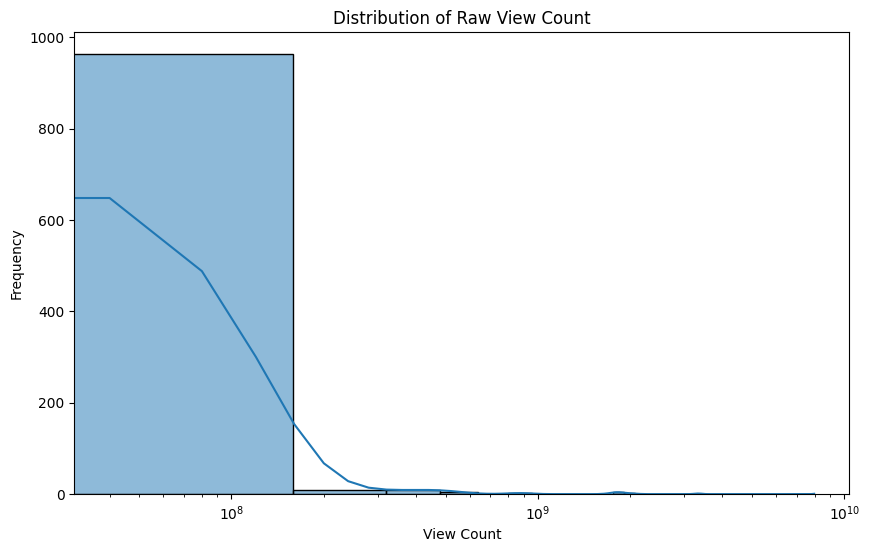

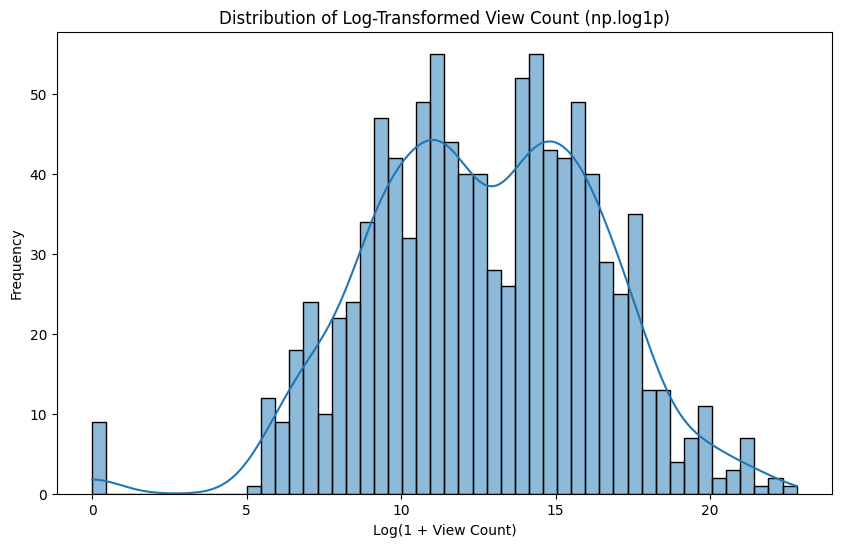

Original View Count descriptive statistics:


,view_count
count,1.000000e+03
mean,4.671539e+07
std,3.426310e+08
min,0.000000e+00
25%,2.211625e+04
50%,3.008230e+05
75%,5.121081e+06
max,7.966443e+09



Log-Transformed View Count descriptive statistics:


,log_view_count
count,1000.000000
mean,12.682211
std,3.669522
min,0.000000
25%,10.004109
50%,12.614274
75%,15.448872
max,22.798504


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyze the distribution of the raw view_count
plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['view_count'], bins=50, kde=True)
plt.title('Distribution of Raw View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale for better visualization of skewed data
plt.show()

# Analyze the distribution after logarithmic transformation
# Use np.log1p which is log(1+x) to handle zero values
videos_df_copy['log_view_count'] = np.log1p(videos_df_copy['view_count'])

plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['log_view_count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed View Count (np.log1p)')
plt.xlabel('Log(1 + View Count)')
plt.ylabel('Frequency')
plt.show()

print("Original View Count descriptive statistics:")
display(videos_df_copy['view_count'].describe())

print("\nLog-Transformed View Count descriptive statistics:")
display(videos_df_copy['log_view_count'].describe())

In [40]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas to work with DataFrame columns

# Identify all numerical columns to be used as features for supervised learning
# Exclude original columns that are not features (like ids, text, original counts)
# Crucially, exclude both 'view_count' and 'views_per_subs' to avoid target leakage
# Also exclude 'log_view_count' and the 'performance_category' dummy columns as they are target-derived.
# Include engineered numerical features: RQS components (excluding views_per_subs),
# RQS, thumbnail features (face, color), text embeddings, channel_subs.

# List of columns to exclude from the numerical features for supervised learning
exclude_cols_supervised = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'view_count', 'views_per_subs', # Exclude both primary target variables
    'log_view_count', # Exclude log-transformed target
    'like_count', 'comment_count', # Exclude original counts as their ratios are used, or they are part of target derivation
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb', # Exclude original complex feature columns
    # Exclude performance_category dummy columns as they are target-derived
    'performance_category_bottom_performer',
    'performance_category_random_sample',
    'performance_category_top_performer'
]

# Get all numerical columns that are simple scalars (not lists or arrays within the column)
numerical_scalar_cols = [
    col for col in videos_df_copy.columns
    if pd.api.types.is_numeric_dtype(videos_df_copy[col]) and videos_df_copy[col].ndim == 1
]

# Filter out the excluded columns to get the final list of feature names for supervised learning
# Ensure we are not excluding columns that are part of the RQS components but are not views_per_subs, like like_ratio and comment_ratio
features_for_supervised_learning = [
    col for col in numerical_scalar_cols
    if col not in exclude_cols_supervised
]

# Create the feature matrix X_supervised using the selected columns
# Use .loc to ensure column order is based on features_for_supervised_learning
X_supervised = videos_df_copy.loc[:, features_for_supervised_learning]

# Handle any remaining potential NaN values in the feature matrix
X_supervised = X_supervised.fillna(0) # Fill NaN with 0 for simplicity

# Initialize the StandardScaler
scaler_supervised = StandardScaler()

# Scale the feature matrix for supervised learning
X_supervised_scaled = scaler_supervised.fit_transform(X_supervised)


# Create the feature names list for Views per Subscriber prediction
# This is the same as features_for_supervised_learning since both view_count and views_per_subs are excluded
features_for_vps_prediction = features_for_supervised_learning
# The scaled feature matrix for VPS prediction is the same as for views prediction
X_supervised_vps = X_supervised_scaled


# Define the target variables
y_views = videos_df_copy['view_count']
y_views_per_subs = videos_df_copy['views_per_subs']
# Also define the log-transformed views target
y_log_views = videos_df_copy['log_view_count'] # Assuming log_view_count was created earlier


print(f"Prepared a feature matrix for Supervised Learning with shape: {X_supervised_scaled.shape}")
print(f"Features used for Supervised Learning (both views and VPS): {features_for_supervised_learning[:10]}...") # Displaying first 10 feature names
print(f"\nTarget variable for Raw Views: 'view_count'")
print(f"Target variable for Views per Subscriber: 'views_per_subs'")
print(f"Target variable for Log-Transformed Views: 'log_view_count'")

Prepared a feature matrix for Supervised Learning with shape: (1000, 1186)
Features used for Supervised Learning (both views and VPS): ['channel_subs', 'like_ratio', 'comment_ratio', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2']...

Target variable for Raw Views: 'view_count'
Target variable for Views per Subscriber: 'views_per_subs'
Target variable for Log-Transformed Views: 'log_view_count'


In [41]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X_supervised and the target variables y_views and y_views_per_subs
# Assuming X_scaled (from clustering preparation) is the feature matrix for supervised learning
# and 'view_count' and 'views_per_subs' are the target variables from videos_df_copy.

# X_supervised is now the single feature set excluding both view_count and views_per_subs
# X_supervised is already scaled as X_supervised_scaled from the previous cell (409866da)
X_supervised = X_supervised_scaled # Use the single scaled feature set

y_views = videos_df_copy['view_count']
y_views_per_subs = videos_df_copy['views_per_subs']

# Split the data for predicting views
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(
    X_supervised, y_views, test_size=0.2, random_state=42
)

# Split the data for predicting views per subscriber
# Use the same corrected feature set X_supervised
X_train_vps, X_test_vps, y_train_vps, y_test_vps = train_test_split(
    X_supervised, y_views_per_subs, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for both target variables.")
print(f"Shape of X_train_views: {X_train_views.shape}")
print(f"Shape of y_train_views: {y_train_views.shape}")
print(f"Shape of X_test_views: {X_test_views.shape}")
print(f"Shape of y_test_views: {y_test_views.shape}")
print(f"Shape of X_train_vps: {X_train_vps.shape}")
print(f"Shape of y_train_vps: {y_train_vps.shape}")
print(f"Shape of X_test_vps: {X_test_vps.shape}")
print(f"Shape of y_test_vps: {y_test_vps.shape}")

Data split into training and testing sets for both target variables.
Shape of X_train_views: (800, 1186)
Shape of y_train_views: (800,)
Shape of X_test_views: (200, 1186)
Shape of y_test_views: (200,)
Shape of X_train_vps: (800, 1186)
Shape of y_train_vps: (800,)
Shape of X_test_vps: (200, 1186)
Shape of y_test_vps: (200,)


# 9. Unsupervised Learning - PCA and K-Means Clustering
* **Objective**: Use PCA for dimensionality reduction and K-Means clustering to group videos based on their features.
* **Code**:
    * Applies PCA and plots explained variance to determine the number of components.
    * Applies PCA and K-Means clustering, adding cluster labels to the DataFrame.
    * Analyze and visualize cluster characteristics.
* **Parameters**:
    * Number of PCA components: 311
    * Number of K-Means clusters: 5
    * Random state for K-Means: 42

In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Create and Scale Features for Clustering (Final Version) ---

# 1. Define columns to EXCLUDE.
#    CORRECTED: We now EXCLUDE the raw 'view_count' and INCLUDE 'log_view_count'.
exclude_cols_clustering = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb',
    'view_count' # Exclude the raw, skewed view count
]

# 2. Select all columns that are purely numerical
numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()

# 3. Filter out the excluded columns to get the final feature list for clustering
features_for_clustering = [
    col for col in numerical_cols if col not in exclude_cols_clustering
]

# 4. Create the feature matrix for clustering
X_clustering = videos_df_copy[features_for_clustering]

# 5. Handle any potential missing values
X_clustering = X_clustering.fillna(0)

# 6. Initialize the StandardScaler and create the X_scaled variable
scaler_clustering = StandardScaler()
X_scaled = scaler_clustering.fit_transform(X_clustering)

print("Successfully created and scaled the feature matrix for clustering.")
print(f"Shape of X_scaled: {X_scaled.shape}")
print("\nFeatures included in clustering (first 15):")
# This should now include 'log_view_count' instead of 'view_count'
print(features_for_clustering[:15])

Successfully created and scaled the feature matrix for clustering.
Shape of X_scaled: (1000, 1190)

Features included in clustering (first 15):
['like_count', 'comment_count', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4']


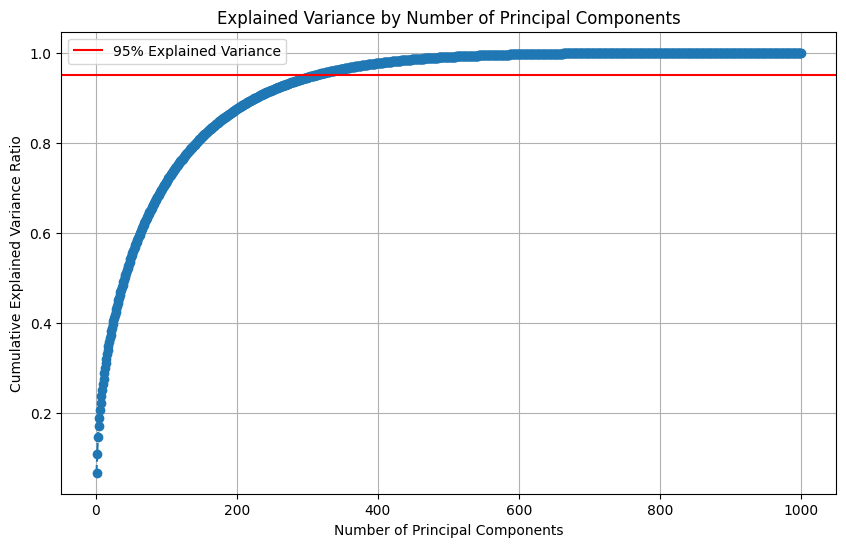

Explained variance ratio for the first 10 components:


array([0.0673494 , 0.04074029, 0.03898628, 0.02303105, 0.01965216,
       0.01659292, 0.01594436, 0.01519245, 0.01389241, 0.0127018 ])


Number of components needed to explain 95% of variance: 311


In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
# We'll start by fitting PCA on the entire number of features to analyze explained variance
pca = PCA()

# Fit PCA on the scaled feature matrix
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance by number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

# Display the explained variance ratio for the first few components
print("Explained variance ratio for the first 10 components:")
display(pca.explained_variance_ratio_[:10])

# Find the number of components needed to explain a certain percentage of variance (e.g., 95%)
n_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95_variance}")

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Re-initialize PCA with the desired number of components (311)
n_components = 311
pca = PCA(n_components=n_components)

# Apply PCA to the scaled feature matrix
X_pca = pca.fit_transform(X_scaled)

print(f"Applied PCA, reduced feature matrix shape: (233, {n_components})") # Corrected print statement

# Apply K-Means clustering to the PCA-reduced data
n_clusters = 5 # Based on the number of genres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Explicitly set n_init
cluster_labels = kmeans.fit_predict(X_pca)

# Add the cluster labels to the DataFrame copy
videos_df_copy['kmeans_cluster_label'] = cluster_labels

# Display the first few rows with the new cluster labels
# Check if 'genre' and 'performance_category' are in videos_df_copy before displaying
display_cols = ['title', 'kmeans_cluster_label']
if 'genre' in videos_df_copy.columns:
    display_cols.insert(1, 'genre') # Add genre after title if it exists
if 'performance_category' in videos_df_copy.columns:
     # Find the index where 'genre' was inserted, or insert after 'title' if 'genre' wasn't there
    try:
        genre_idx = display_cols.index('genre')
        display_cols.insert(genre_idx + 1, 'performance_category')
    except ValueError: # 'genre' wasn't in display_cols
        display_cols.insert(1, 'performance_category')


display(videos_df_copy[display_cols].head())


# Display the count of videos in each cluster
display(videos_df_copy['kmeans_cluster_label'].value_counts())

Applied PCA, reduced feature matrix shape: (233, 311)


,title,kmeans_cluster_label
0,VeggieTales: The Hairbrush Song - Silly Song,1
1,VeggieTales: His Cheeseburger - Silly Song,1
2,VeggieTales | Noah's Ark,1
3,VeggieTales: Song of the Cebu | Silly Songs wi...,1
4,VeggieTales: The Pirates Who Don't Do Anything...,1


,count
kmeans_cluster_label,
2,449
0,177
1,176
4,159
3,39


In [45]:
# Analyze the characteristics of each cluster by grouping by 'kmeans_cluster_label'

# Select a subset of interpretable numerical features to analyze per cluster
interpretable_numerical_features = [
    'rqs', 'like_ratio', 'comment_ratio', 'views_per_subs',
    'sentiment_score', 'average_comment_length', 'face_area_percentage',
    'average_r', 'average_g', 'average_b'
    # We can add dimensions of embeddings or flattened colors later if needed, but it's less directly interpretable
]

# Calculate the mean of these features for each cluster
print("Mean of interpretable numerical features per cluster:")
# Ensure 'kmeans_cluster_label' and the features exist in the DataFrame
interpretable_numerical_features_check = [col for col in interpretable_numerical_features if col in videos_df_copy.columns]
if 'kmeans_cluster_label' in videos_df_copy.columns and interpretable_numerical_features_check:
    display(videos_df_copy.groupby('kmeans_cluster_label')[interpretable_numerical_features_check].mean())
else:
    print("Clustering results or interpretable features not available in videos_df_copy.")


print("\nDistribution of performance categories within each cluster:")
# Ensure 'performance_category' is in videos_df_copy before trying to group by it
if 'performance_category' in videos_df_copy.columns:
     display(videos_df_copy.groupby('kmeans_cluster_label')['performance_category'].value_counts().unstack().fillna(0))
else:
    print("'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.")


Mean of interpretable numerical features per cluster:


,rqs,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,face_area_percentage,average_r,average_g,average_b
kmeans_cluster_label,,,,,,,,,,
0,0.161129,0.160332,0.018434,0.011946,0.601359,0.161518,2.927718,82.314328,76.986657,75.682997
1,0.099529,0.022915,0.000075,0.062667,0.510971,0.003274,1.485361,116.358304,110.420203,102.117899
2,0.155747,0.152093,0.013102,0.012654,0.611658,0.125866,4.439539,93.718867,87.947118,82.869676
3,0.182201,0.162496,0.008367,0.017298,0.749012,0.151021,1.913833,109.453143,105.455425,102.260556
4,0.225938,0.282367,0.065563,0.014733,0.679477,0.225104,7.234732,87.175445,74.221232,66.689866



Distribution of performance categories within each cluster:
'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.


Shape of X_pca: (1000, 311)
Shape of videos_df_copy index: (1000,)
Shape of cluster_labels: (1000,)
Successfully added PCA components and cluster labels to videos_df_copy.


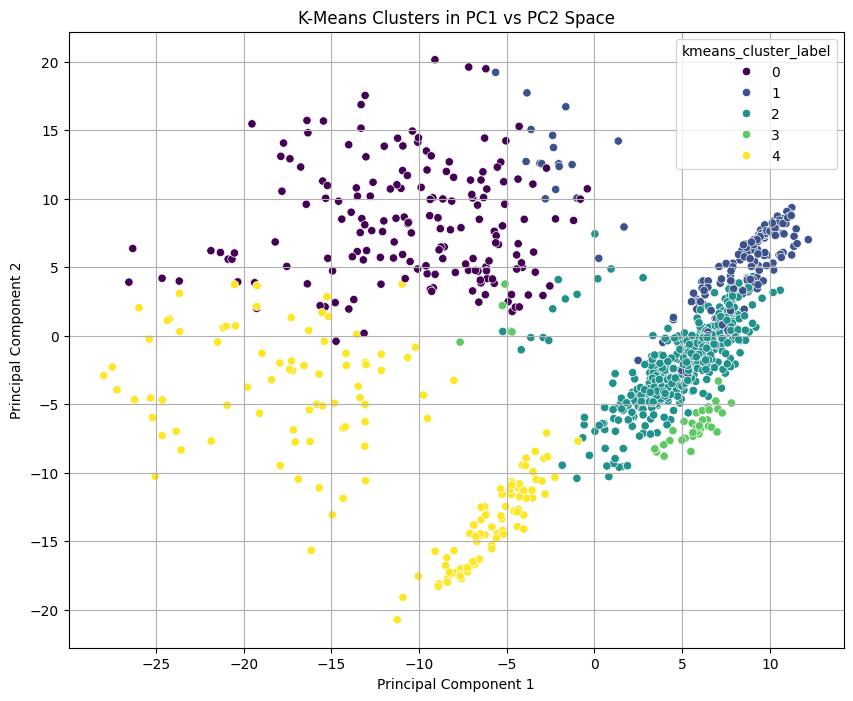

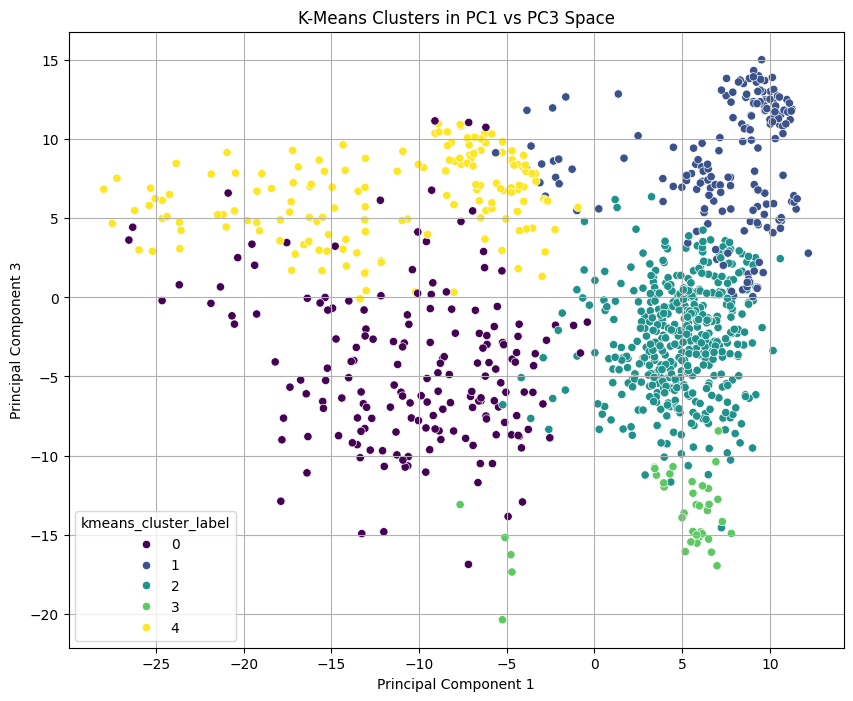

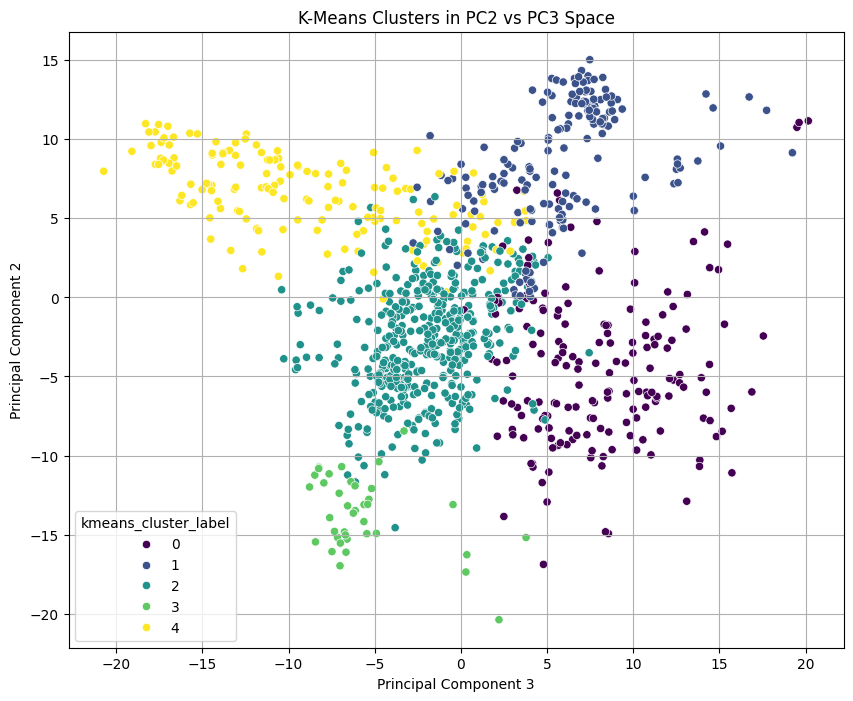

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Ensure X_pca and cluster_labels are defined (from the clustering step)
# If the execution state was reset, you need to rerun the PCA and K-Means clustering cell first.
# Assuming X_pca (PCA-reduced data) and cluster_labels (K-Means labels) are available.

# Check the shape of X_pca before creating the DataFrame
print(f"Shape of X_pca: {X_pca.shape}")
print(f"Shape of videos_df_copy index: {videos_df_copy.index.shape}")
# Check the shape of cluster_labels
print(f"Shape of cluster_labels: {cluster_labels.shape}")


# Ensure X_pca is a numpy array
X_pca = np.asarray(X_pca)

# Create a pandas Series for cluster_labels with the same index as videos_df_copy
# This ensures proper alignment with the PCA components
cluster_labels_series = pd.Series(cluster_labels, index=videos_df_copy.index, name='kmeans_cluster_label')

# Add PCA components to the videos_df_copy DataFrame for easier plotting
# Create column names for the PCA components
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, index=videos_df_copy.index, columns=pca_cols)

# Concatenate PCA components and the cluster labels Series with videos_df_copy
# Preserve existing columns in videos_df_copy
# Drop existing PC columns before concatenating to avoid duplicates if the cell is run multiple times
existing_pc_cols = [col for col in videos_df_copy.columns if col.startswith('PC')]
videos_df_copy = videos_df_copy.drop(columns=existing_pc_cols, errors='ignore')
# Drop existing kmeans_cluster_label column before concatenating
videos_df_copy = videos_df_copy.drop(columns=['kmeans_cluster_label'], errors='ignore')


videos_df_copy = pd.concat([videos_df_copy, pca_df, cluster_labels_series], axis=1)

print("Successfully added PCA components and cluster labels to videos_df_copy.")


# Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC2 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Visualize the clusters in PC1 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC3 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.show()

# Visualize the clusters in PC2 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC2 vs PC3 Space')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 3')
plt.grid(True)
plt.show()

In [47]:
import pandas as pd

# Assuming 'pca' is your fitted PCA object and
# 'features_for_clustering' is the list of your original feature names before scaling.

# 1. Create a DataFrame of the PCA loadings
# The pca.components_ attribute has a shape of (n_components, n_features)
loadings_df = pd.DataFrame(
    pca.components_.T, # Transpose to make features as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_for_clustering
)

# 2. Function to get and display top features for a given component
def get_top_features_for_pc(pc_name, top_n=10):
    print(f"--- Top {top_n} Influential Features for {pc_name} ---")
    # Sort by the absolute value of the loading to find the most influential
    top_features = loadings_df[pc_name].abs().sort_values(ascending=False).head(top_n)
    # Display the top features with their actual loading scores (not absolute)
    print(loadings_df.loc[top_features.index][[pc_name]])

# 3. Display the top features for PC1, PC2, and PC3
get_top_features_for_pc('PC1')
print("\n")
get_top_features_for_pc('PC2')
print("\n")
get_top_features_for_pc('PC3')

--- Top 10 Influential Features for PC1 ---
                               PC1
thumbnail_text_embed_223  0.087198
thumbnail_text_embed_319  0.085419
thumbnail_text_embed_62   0.083639
thumbnail_text_embed_363 -0.080817
thumbnail_text_embed_99  -0.080487
thumbnail_text_embed_125  0.080237
thumbnail_text_embed_247 -0.080109
thumbnail_text_embed_94  -0.079728
thumbnail_text_embed_327  0.078836
thumbnail_text_embed_324 -0.077953


--- Top 10 Influential Features for PC2 ---
                     PC2
tags_embed_62   0.082729
tags_embed_2    0.081763
tags_embed_147  0.079647
tags_embed_295  0.079618
tags_embed_280  0.078947
tags_embed_259 -0.077875
tags_embed_261 -0.077466
tags_embed_293 -0.075695
tags_embed_343  0.072591
tags_embed_164 -0.072422


--- Top 10 Influential Features for PC3 ---
                     PC3
tags_embed_377  0.096272
tags_embed_24  -0.092222
tags_embed_132  0.088364
tags_embed_173  0.087960
tags_embed_211  0.086939
tags_embed_292  0.085382
tags_embed_90  -0.085337
tags

In [48]:
import pandas as pd

# Assuming 'pca', 'features_for_clustering', and 'videos_df_copy' are already defined.

# 1. Create a DataFrame of the PCA loadings (same as before)
loadings_df = pd.DataFrame(
    pca.components_.T, # Transpose to make features as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_for_clustering
)

# 2. Modified function to show influential features AND their representative text
def investigate_pc_loadings(pc_name, top_n=5, examples_per_feature=3):
    """
    Finds top influential features for a PC and shows example text from videos
    that score high on those features.
    """
    print(f"--- Investigating Top {top_n} Influential Features for {pc_name} ---")

    # Get the top N most influential features by absolute loading
    top_features_series = loadings_df[pc_name].abs().sort_values(ascending=False).head(top_n)

    # Loop through each of the top influential features
    for feature_name, abs_loading in top_features_series.items():
        loading = loadings_df.loc[feature_name, pc_name]
        print(f"\nFeature: {feature_name} (Loading: {loading:.4f})")

        # Determine which text column to show based on the feature name
        if 'thumbnail_text_embed' in feature_name:
            text_column = 'thumbnail_text'
        elif 'tags_embed' in feature_name:
            text_column = 'tags'
        elif 'title_embed' in feature_name:
            text_column = 'title'
        else:
            print("  (This is a numerical feature, not a text embedding.)")
            continue

        # Find videos with the highest values for this specific embedding feature
        top_videos = videos_df_copy.sort_values(by=feature_name, ascending=False).head(examples_per_feature)

        print(f"  Example text from videos with high values for this feature:")
        for index, row in top_videos.iterrows():
            # Use .get() to handle potential missing text gracefully
            example_text = row.get(text_column, "N/A")
            print(f"    - '{example_text}'")

# 3. Display the analysis for PC1, PC2, and PC3
investigate_pc_loadings('PC1')
print("\n" + "="*50 + "\n")
investigate_pc_loadings('PC2')
print("\n" + "="*50 + "\n")
investigate_pc_loadings('PC3')

--- Investigating Top 5 Influential Features for PC1 ---

Feature: thumbnail_text_embed_223 (Loading: 0.0872)
  Example text from videos with high values for this feature:
    - 'nan'
    - 'nan'
    - 'nan'

Feature: thumbnail_text_embed_319 (Loading: 0.0854)
  Example text from videos with high values for this feature:
    - 'BLACK HOLE

co = SOLAR
SYSTEM'
    - 'nan'
    - 'nan'

Feature: thumbnail_text_embed_62 (Loading: 0.0836)
  Example text from videos with high values for this feature:
    - 'RUIN
EVERYTHING
FOR MONEY

A 2'
    - 'WHAT DO
THEY WANT?'
    - 'YOU SHOULD
Le a Led'

Feature: thumbnail_text_embed_363 (Loading: -0.0808)
  Example text from videos with high values for this feature:
    - '‘ js th
si cL

UP WHEN
YOU FALL'
    - 'YOU SHOULD
Le a Led'
    - 'PRAY WITH US:
THE HOLY

ROSARY'

Feature: thumbnail_text_embed_99 (Loading: -0.0805)
  Example text from videos with high values for this feature:
    - 'll'
    - 'Uses'
    - 'OUT'


--- Investigating Top 5 Influen

# 10. Supervised Learning - Model Training and Evaluation

* train_ctr_standalone.py: This cell trains a model to predict the Click-Through Rate (CTR), specifically the log-transformed views per subscriber (ctr_log). It uses pre-generated embeddings, various engineered features (visual, duration, title structure), and genre/subscriber bucket information. It trains a baseline linear regression model and then a more complex model (Ridge, RandomForest, or GradientBoosting) on the residuals to improve the prediction of CTR.
* train_rqs_standalone.py: This cell focuses on predicting the Retention Quality Score (RQS). It first computes the RQS components (like ratio, comment ratio, views per subscriber, sentiment score, and comment depth). It then normalizes these components based on genre and subscriber buckets and calculates the final rqs_score. A regression model (Ridge, RandomForest, or GradientBoosting) is trained using pre-publish features (embeddings, visual features, duration, title structure) to predict this rqs_score.
* train_views_standalone.py: This cell trains the final model to predict raw view_count. It leverages the predictions from the previously trained CTR and RQS models as key features. It also uses a physics-based baseline model (log(views) based on log(subs), log(age), and genre) and then trains a residual model (RandomForest, GradientBoosting, or Ridge) on the log-transformed views residual using the CTR and RQS predictions along with other features. The final view prediction is the sum of the baseline and residual predictions, exponentiated back to the original scale.

In [49]:
%pip install isodate

In [50]:
import pandas as pd
import os

csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

try:
    print(f"Loading data from {csv_path}")
    videos_df = pd.read_csv(csv_path)
    videos_df_copy = videos_df.copy()
    print("DataFrame loaded and copied successfully.")
    print(f"Shape of videos_df_copy: {videos_df_copy.shape}")
except FileNotFoundError:
    print(f"Error: The file {csv_path} was not found.")
except Exception as e:
    print(f"An error occurred while loading or processing the CSV: {e}")

Loading data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv
DataFrame loaded and copied successfully.
Shape of videos_df_copy: (1000, 30)


In [51]:
# =========================
# generate_embeddings_once.py
# Creates embeddings ONCE and saves enhanced CSV for all future use
# =========================

import os
import ast
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import isodate
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
OUT_DIR = os.environ.get("YT_OUT_DIR", "/content/drive/MyDrive/data/youtubeExtractor")
INPUT_CSV = os.environ.get("YT_FEATURES_CSV", f"{OUT_DIR}/videos_with_features.csv")
OUTPUT_CSV = f"{OUT_DIR}/videos_with_features_embeds.csv"
os.makedirs(OUT_DIR, exist_ok=True)

print("=" * 70)
print("ONE-TIME EMBEDDING GENERATION")
print("=" * 70)

# ---------- Load Original Data ----------
print(f"\n[1] Loading original data from {INPUT_CSV}")
df = pd.read_csv(INPUT_CSV)
print(f"    Original shape: {df.shape}")

# Check if embeddings already exist
existing_embed_cols = [col for col in df.columns if 'embed' in col.lower()]
if existing_embed_cols:
    print(f"    WARNING: Found {len(existing_embed_cols)} existing embedding columns")
    print("    These will be replaced with new embeddings")

# ---------- Parse Complex Fields ----------
print("\n[2] Parsing complex fields...")
for col in ["tags", "dominant_colors", "color_palette", "average_rgb", "comment_texts", "comments"]:
    if col in df.columns:
        def safe_eval(x):
            if isinstance(x, str) and x.strip().startswith("["):
                try: return ast.literal_eval(x)
                except: return [] if col in ["tags", "comment_texts", "comments"] else None
            return x
        df[col] = df[col].apply(safe_eval)
        print(f"    Parsed {col}")

# ---------- GENERATE ALL EMBEDDINGS ----------
print("\n[3] Generating embeddings for all text fields...")

def create_text_embeddings(texts, prefix, n_components=30, max_features=5000):
    """Create TF-IDF based embeddings for text and save the models"""
    texts = texts.fillna("")

    # Skip if all texts are empty
    if texts.str.strip().eq("").all():
        print(f"    Skipping {prefix} - all texts are empty")
        return pd.DataFrame(), None, None

    print(f"    Creating {prefix} embeddings...")

    # TF-IDF vectorization
    tfidf = TfidfVectorizer(
        max_features=max_features,
        ngram_range=(1, 2),  # unigrams and bigrams
        stop_words='english',
        min_df=2,
        max_df=0.95,
        strip_accents='unicode',
        lowercase=True
    )

    try:
        tfidf_matrix = tfidf.fit_transform(texts)

        # Check if we have enough features
        if tfidf_matrix.shape[1] < 2:
            print(f"      Not enough features for {prefix}, skipping")
            return pd.DataFrame(), None, None

        # Dimensionality reduction with SVD
        n_comp = min(n_components, tfidf_matrix.shape[1] - 1)
        svd = TruncatedSVD(n_components=n_comp, random_state=42)
        embeddings = svd.fit_transform(tfidf_matrix)

        # Create dataframe with embedding columns
        embed_df = pd.DataFrame(
            embeddings,
            columns=[f"{prefix}_embed_{i}" for i in range(embeddings.shape[1])],
            index=texts.index
        )

        print(f"      Created {embeddings.shape[1]} dimensions")
        print(f"      Explained variance: {svd.explained_variance_ratio_.sum():.2%}")

        return embed_df, tfidf, svd

    except Exception as e:
        print(f"      Error creating {prefix} embeddings: {e}")
        return pd.DataFrame(), None, None

# Store all embeddings
all_embeddings = []
embedding_models = {}  # Store TF-IDF and SVD models

# 1. Title embeddings (most important for CTR)
if "title" in df.columns:
    title_embeds, tfidf_title, svd_title = create_text_embeddings(df["title"], "title", n_components=30, max_features=5000)
    if not title_embeds.empty:
        all_embeddings.append(title_embeds)
        embedding_models['title'] = {'tfidf': tfidf_title, 'svd': svd_title}

# 2. Description embeddings
if "description" in df.columns:
    desc_embeds, tfidf_desc, svd_desc = create_text_embeddings(df["description"], "description", n_components=30, max_features=5000)
    if not desc_embeds.empty:
        all_embeddings.append(desc_embeds)
        embedding_models['description'] = {'tfidf': tfidf_desc, 'svd': svd_desc}

# 3. Tags embeddings
if "tags" in df.columns:
    # Convert list of tags to text
    df["tags_text"] = df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
    tags_embeds, tfidf_tags, svd_tags = create_text_embeddings(df["tags_text"], "tags", n_components=20, max_features=3000)
    if not tags_embeds.empty:
        all_embeddings.append(tags_embeds)
        embedding_models['tags'] = {'tfidf': tfidf_tags, 'svd': svd_tags}

# 4. Thumbnail text embeddings
if "thumbnail_text" in df.columns:
    thumb_embeds, tfidf_thumb, svd_thumb = create_text_embeddings(df["thumbnail_text"], "thumb_text", n_components=15, max_features=2000)
    if not thumb_embeds.empty:
        all_embeddings.append(thumb_embeds)
        embedding_models['thumb_text'] = {'tfidf': tfidf_thumb, 'svd': svd_thumb}

# 5. Caption embeddings (if available)
if "caption_info" in df.columns:
    caption_embeds, tfidf_caption, svd_caption = create_text_embeddings(df["caption_info"], "caption", n_components=20, max_features=3000)
    if not caption_embeds.empty:
        all_embeddings.append(caption_embeds)
        embedding_models['caption'] = {'tfidf': tfidf_caption, 'svd': svd_caption}

# Combine all embeddings with original data
if all_embeddings:
    df_with_embeds = pd.concat([df] + all_embeddings, axis=1)
    print(f"\n[4] Combined embeddings with original data")
    print(f"    New shape: {df_with_embeds.shape}")
    print(f"    Added {sum(len(e.columns) for e in all_embeddings)} embedding features")
else:
    df_with_embeds = df
    print("\n[4] No embeddings were created")

# ---------- ADDITIONAL FEATURE ENGINEERING ----------
print("\n[5] Engineering additional features...")

# Duration in seconds
def parse_duration_safe(x):
    try: return isodate.parse_duration(x).total_seconds() if isinstance(x, str) else float(x)
    except: return 0.0

if "duration_seconds" not in df_with_embeds.columns and "duration" in df_with_embeds.columns:
    df_with_embeds["duration_seconds"] = df_with_embeds["duration"].apply(parse_duration_safe)
    print("    Added duration_seconds")

# Log transformations
df_with_embeds["log_duration"] = np.log1p(df_with_embeds.get("duration_seconds", 0))
df_with_embeds["log_views"] = np.log1p(df_with_embeds.get("view_count", 0))
df_with_embeds["log_likes"] = np.log1p(df_with_embeds.get("like_count", 0))
df_with_embeds["log_comments"] = np.log1p(df_with_embeds.get("comment_count", 0))
print("    Added log transformations")

# Age calculation
if "published_at" in df_with_embeds.columns:
    df_with_embeds["published_at"] = pd.to_datetime(df_with_embeds["published_at"], errors="coerce")
    now = pd.Timestamp.now(tz='UTC')
    df_with_embeds["published_at"] = df_with_embeds["published_at"].dt.tz_convert('UTC')
    df_with_embeds["age_days"] = (now - df_with_embeds["published_at"]).dt.days
    df_with_embeds["age_days"] = df_with_embeds["age_days"].fillna(0).clip(lower=0)
    df_with_embeds["log_age"] = np.log1p(df_with_embeds["age_days"])
    print("    Added age features")

# Channel metrics
if "channel_subs" in df_with_embeds.columns:
    df_with_embeds["log_subs"] = np.log1p(np.maximum(df_with_embeds["channel_subs"].fillna(0), 0))
    print("    Added log_subs")

# Title features
if "title" in df_with_embeds.columns:
    df_with_embeds["title_length"] = df_with_embeds["title"].fillna("").str.len()
    df_with_embeds["title_word_count"] = df_with_embeds["title"].fillna("").str.split().str.len()
    df_with_embeds["title_caps_ratio"] = df_with_embeds["title"].fillna("").apply(
        lambda x: sum(c.isupper() for c in x) / max(len(x), 1)
    )
    df_with_embeds["title_has_numbers"] = df_with_embeds["title"].fillna("").str.contains(r'\d', regex=True).astype(int)
    print("    Added title features")

# Visual features from RGB
if "average_rgb" in df_with_embeds.columns:
    def extract_rgb(rgb_list):
        if isinstance(rgb_list, list) and len(rgb_list) == 3:
            return pd.Series(rgb_list)
        return pd.Series([128, 128, 128])

    rgb_df = df_with_embeds["average_rgb"].apply(extract_rgb)
    rgb_df.columns = ["avg_r", "avg_g", "avg_b"]

    # Add RGB columns if they don't exist
    for col in rgb_df.columns:
        if col not in df_with_embeds.columns:
            df_with_embeds[col] = rgb_df[col]

    # Psychovisual features
    df_with_embeds["brightness"] = (df_with_embeds["avg_r"] + df_with_embeds["avg_g"] + df_with_embeds["avg_b"]) / (3 * 255)
    df_with_embeds["saturation"] = df_with_embeds[["avg_r", "avg_g", "avg_b"]].std(axis=1) / 255
    df_with_embeds["warm_cool"] = (df_with_embeds["avg_r"] - df_with_embeds["avg_b"]) / 255
    print("    Added visual features")

# ---------- SAVE ENHANCED DATASET ----------
print(f"\n[6] Saving enhanced dataset to {OUTPUT_CSV}")
df_with_embeds.to_csv(OUTPUT_CSV, index=False)
print(f"    Saved {df_with_embeds.shape[0]} rows × {df_with_embeds.shape[1]} columns")

# ---------- SAVE EMBEDDING MODELS ----------
print("\n[7] Saving TF-IDF and SVD models for prediction API...")
import joblib

models_saved = 0
for text_type, models in embedding_models.items():
    if models['tfidf'] is not None and models['svd'] is not None:
        tfidf_path = os.path.join(OUT_DIR, f"tfidf_{text_type}.joblib")
        svd_path = os.path.join(OUT_DIR, f"svd_{text_type}.joblib")

        joblib.dump(models['tfidf'], tfidf_path)
        joblib.dump(models['svd'], svd_path)

        print(f"    Saved {text_type} models:")
        print(f"      - {tfidf_path}")
        print(f"      - {svd_path}")
        models_saved += 2

if models_saved > 0:
    print(f"    Total: {models_saved} embedding models saved")
else:
    print("    Warning: No embedding models were saved")

# ---------- SUMMARY ----------
print("\n" + "=" * 70)
print("EMBEDDING GENERATION COMPLETE")
print("=" * 70)
print(f"\nOriginal columns: {df.shape[1]}")
print(f"Enhanced columns: {df_with_embeds.shape[1]}")
print(f"Embeddings added: {df_with_embeds.shape[1] - df.shape[1]}")
print(f"Models saved: {models_saved}")

# Show embedding column breakdown
embed_cols = [col for col in df_with_embeds.columns if 'embed' in col]
if embed_cols:
    print("\nEmbedding breakdown:")
    for prefix in ['title', 'description', 'tags', 'thumb_text', 'caption']:
        count = sum(1 for col in embed_cols if col.startswith(f"{prefix}_embed"))
        if count > 0:
            print(f"  {prefix}: {count} dimensions")

print(f"\n✅ Use '{OUTPUT_CSV}' for all model training!")
print("   This file contains all embeddings and engineered features.")
print("   No need to regenerate embeddings in training scripts.")
print("\n✅ TF-IDF and SVD models saved for prediction API!")
print("   The prediction API will now use real embeddings instead of placeholders.")

ONE-TIME EMBEDDING GENERATION

[1] Loading original data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv
    Original shape: (1000, 30)

[2] Parsing complex fields...
    Parsed tags
    Parsed dominant_colors
    Parsed color_palette
    Parsed average_rgb
    Parsed comment_texts
    Parsed comments

[3] Generating embeddings for all text fields...
    Creating title embeddings...
      Created 30 dimensions
      Explained variance: 23.94%
    Creating description embeddings...
      Created 30 dimensions
      Explained variance: 51.20%
    Creating tags embeddings...
      Created 20 dimensions
      Explained variance: 38.88%
    Creating thumb_text embeddings...
      Created 15 dimensions
      Explained variance: 33.88%
    Creating caption embeddings...
      Created 20 dimensions
      Explained variance: 97.35%

[4] Combined embeddings with original data
    New shape: (1000, 146)
    Added 115 embedding features

[5] Engineering additional featur

#CTR

In [52]:
# =========================
# train_ctr_standalone.py
# Trains CTR (Click-Through Rate) model using pre-generated embeddings
# =========================

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
OUT_DIR = os.environ.get("YT_OUT_DIR", "/content/drive/MyDrive/data/youtubeExtractor")
EMBEDS_CSV = f"{OUT_DIR}/videos_with_features_embeds.csv"
os.makedirs(OUT_DIR, exist_ok=True)

print("=" * 70)
print("CTR MODEL TRAINING (STANDALONE)")
print("=" * 70)

# ---------- LOAD DATA ----------
print(f"\n[1] Loading data from {EMBEDS_CSV}")
df = pd.read_csv(EMBEDS_CSV)
print(f"    Shape: {df.shape}")

# Check embeddings
embed_cols = [col for col in df.columns if 'embed' in col]
print(f"    Found {len(embed_cols)} embedding columns")

# ---------- PREPARE FEATURES ----------
print("\n[2] Preparing features...")

# Genre encoding
if "genre" not in df.columns:
    df["genre"] = "unknown"
df["genre"] = df["genre"].astype("category")
genre_ohe = pd.get_dummies(df["genre"], prefix="genre", dummy_na=False)

# Ensure required columns
if "log_subs" not in df.columns:
    df["log_subs"] = np.log1p(np.maximum(df.get("channel_subs", 0).fillna(0), 0))

if "log_age" not in df.columns and "age_days" in df.columns:
    df["log_age"] = np.log1p(df["age_days"])

if "log_duration" not in df.columns and "duration_seconds" in df.columns:
    df["log_duration"] = np.log1p(df["duration_seconds"])

# ---------- CTR TARGET ----------
print("\n[3] Creating CTR target...")

views = df["view_count"].fillna(0).astype(float)
subs = np.maximum(df.get("channel_subs", 1).fillna(1), 1.0)
df["ctr_log"] = np.log1p(views / subs)

print(f"    CTR range: {df['ctr_log'].min():.2f} - {df['ctr_log'].max():.2f}")
print(f"    CTR mean: {df['ctr_log'].mean():.2f}")

# ---------- BASELINE MODEL ----------
print("\n[4] Training baseline model...")

baseline_features = ["log_age", "log_subs", "log_duration"]
baseline_cols = [c for c in baseline_features if c in df.columns]
X_baseline = pd.concat([df[baseline_cols], genre_ohe], axis=1)

ctr_baseline_model = LinearRegression().fit(X_baseline, df["ctr_log"])
df["ctr_baseline"] = ctr_baseline_model.predict(X_baseline)
df["ctr_residual"] = df["ctr_log"] - df["ctr_baseline"]

baseline_r2 = r2_score(df["ctr_log"], df["ctr_baseline"])
print(f"    Baseline R²: {baseline_r2:.4f}")

# ---------- FEATURE SELECTION ----------
print("\n[5] Selecting features...")

# Pre-publish feature patterns
ctr_feature_patterns = [
    # All embeddings (most important)
    "_embed_",

    # Visual features
    "brightness", "saturation", "warm_cool", "vibrancy",
    "face_area_percentage", "avg_r", "avg_g", "avg_b",

    # Duration
    "duration_seconds", "log_duration",

    # Title structure
    "title_length", "title_word_count", "title_caps_ratio", "title_has_numbers",

    # Other pre-publish
    "tags_count", "sentiment_score", "rqs"
]

ctr_features = []
for pattern in ctr_feature_patterns:
    matching = [c for c in df.columns if pattern in c]
    ctr_features.extend(matching)

# Remove duplicates and post-publish features
ctr_features = list(dict.fromkeys(ctr_features))
exclude = ["view_count", "like_count", "comment_count", "ctr_log",
          "ctr_baseline", "ctr_residual", "channel_subs", "log_subs",
          "age_days", "log_age"]
ctr_features = [f for f in ctr_features if f not in exclude]

X_ctr = pd.concat([df[ctr_features].fillna(0), genre_ohe], axis=1)
y_ctr = df["ctr_residual"]

print(f"    Selected {X_ctr.shape[1]} features")
print(f"    - Embeddings: {sum(1 for c in X_ctr.columns if 'embed' in c)}")
print(f"    - Visual: {sum(1 for c in X_ctr.columns if any(x in c for x in ['bright', 'satur', 'warm', 'vibr', 'avg_', 'face']))}")
print(f"    - Other: {sum(1 for c in X_ctr.columns if 'embed' not in c and not any(x in c for x in ['bright', 'satur', 'warm', 'vibr', 'avg_', 'face', 'genre_']))}")

# ---------- MODEL SELECTION ----------
print("\n[6] Testing models...")

models = {
    "ridge": Ridge(random_state=42),
    "rf": RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1),
    "gbm": GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
ctr_scores = {}

for name, model in models.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])
    scores = cross_val_score(pipe, X_ctr, y_ctr, cv=kf, scoring='r2', n_jobs=-1)
    ctr_scores[name] = scores.mean()
    print(f"    {name}: R² = {ctr_scores[name]:.4f} (±{scores.std():.4f})")

best_model_type = max(ctr_scores, key=ctr_scores.get)
print(f"\n    Best model type: {best_model_type}")

# ---------- HYPERPARAMETER TUNING ----------
print("\n[7] Tuning best model...")

if best_model_type == "rf":
    param_grid = {
        "model__n_estimators": [200, 300],
        "model__max_depth": [15, 20, 25],
        "model__min_samples_split": [2, 5],
        "model__max_features": ["sqrt", 0.3]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
elif best_model_type == "gbm":
    param_grid = {
        "model__n_estimators": [200, 300],
        "model__max_depth": [5, 7],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.8, 1.0]
    }
    base_model = GradientBoostingRegressor(random_state=42)
else:  # ridge
    param_grid = {"model__alpha": np.logspace(-2, 2, 20)}
    base_model = Ridge(random_state=42)

pipe = Pipeline([("scaler", StandardScaler()), ("model", base_model)])
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)
grid.fit(X_ctr, y_ctr)

print(f"    Best params: {grid.best_params_}")
print(f"    Best CV R²: {grid.best_score_:.4f}")

# ---------- OUT-OF-FOLD EVALUATION ----------
print("\n[8] Out-of-fold evaluation...")

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)
ctr_oof = np.zeros(len(X_ctr))

for fold, (train_idx, val_idx) in enumerate(kf_final.split(X_ctr)):
    # Clone best estimator
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("model", grid.best_estimator_.named_steps['model'].__class__(
            **grid.best_estimator_.named_steps['model'].get_params()
        ))
    ])

    model.fit(X_ctr.iloc[train_idx], y_ctr.iloc[train_idx])
    ctr_oof[val_idx] = model.predict(X_ctr.iloc[val_idx])

    fold_r2 = r2_score(y_ctr.iloc[val_idx], ctr_oof[val_idx])
    print(f"    Fold {fold+1}: R² = {fold_r2:.4f}")

# ---------- FINAL METRICS ----------
print("\n[9] Final metrics...")

# Residual metrics
mae_resid = mean_absolute_error(y_ctr, ctr_oof)
rmse_resid = np.sqrt(mean_squared_error(y_ctr, ctr_oof))
r2_resid = r2_score(y_ctr, ctr_oof)

print(f"\n    Residual performance:")
print(f"    MAE:  {mae_resid:.4f}")
print(f"    RMSE: {rmse_resid:.4f}")
print(f"    R²:   {r2_resid:.4f}")

# Reconstruct full CTR predictions
ctr_pred_full = ctr_oof + df["ctr_baseline"]
ctr_true = df["ctr_log"]

mae_full = mean_absolute_error(ctr_true, ctr_pred_full)
rmse_full = np.sqrt(mean_squared_error(ctr_true, ctr_pred_full))
r2_full = r2_score(ctr_true, ctr_pred_full)

print(f"\n    Full CTR prediction:")
print(f"    MAE:  {mae_full:.4f}")
print(f"    RMSE: {rmse_full:.4f}")
print(f"    R²:   {r2_full:.4f}")

# Views/sub scale
views_per_sub_pred = np.expm1(ctr_pred_full)
views_per_sub_true = np.expm1(ctr_true)
mae_vps = mean_absolute_error(views_per_sub_true, views_per_sub_pred)

print(f"\n    Views/Sub scale:")
print(f"    MAE: {mae_vps:.2f} views per subscriber")

# ---------- SAVE MODELS & ARTIFACTS ----------
print("\n[10] Saving models and artifacts...")

# Train final model on all data
final_model = grid.best_estimator_.fit(X_ctr, y_ctr)

# Save everything
joblib.dump(final_model, os.path.join(OUT_DIR, "ctr_model.joblib"))
joblib.dump(ctr_baseline_model, os.path.join(OUT_DIR, "ctr_baseline.joblib"))
joblib.dump(list(X_ctr.columns), os.path.join(OUT_DIR, "ctr_features.joblib"))
joblib.dump(list(X_baseline.columns), os.path.join(OUT_DIR, "ctr_baseline_features.joblib"))
joblib.dump(ctr_oof, os.path.join(OUT_DIR, "ctr_oof_residuals.joblib"))
joblib.dump(ctr_pred_full, os.path.join(OUT_DIR, "ctr_oof_predictions.joblib"))

print(f"    Saved to {OUT_DIR}")

# ---------- FEATURE IMPORTANCE ----------
if hasattr(final_model.named_steps['model'], 'feature_importances_'):
    importances = final_model.named_steps['model'].feature_importances_
    feature_imp = pd.DataFrame({
        'feature': X_ctr.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("\n[11] Top 15 most important features:")
    for idx, row in feature_imp.head(15).iterrows():
        print(f"    {row['feature']}: {row['importance']:.4f}")

    # Save feature importance
    feature_imp.to_csv(os.path.join(OUT_DIR, "ctr_feature_importance.csv"), index=False)

# ---------- SAVE PREDICTIONS ----------
df["ctr_predicted"] = ctr_pred_full
df["ctr_residual_predicted"] = ctr_oof
output_csv = os.path.join(OUT_DIR, "videos_with_ctr_predictions.csv")
df[['video_id', 'title', 'view_count', 'channel_subs', 'ctr_log',
    'ctr_baseline', 'ctr_predicted', 'ctr_residual', 'ctr_residual_predicted']].to_csv(
    output_csv, index=False
)

print("\n" + "=" * 70)
print("CTR MODEL TRAINING COMPLETE")
print("=" * 70)
print(f"\n✅ Final R² = {r2_full:.4f}")
print(f"✅ Predictions saved to {output_csv}")
print(f"✅ Model saved to {OUT_DIR}/ctr_model.joblib")

CTR MODEL TRAINING (STANDALONE)

[1] Loading data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features_embeds.csv
    Shape: (1000, 164)
    Found 115 embedding columns

[2] Preparing features...

[3] Creating CTR target...
    CTR range: 0.00 - 4.17
    CTR mean: 0.47

[4] Training baseline model...
    Baseline R²: 0.0108

[5] Selecting features...
    Selected 131 features
    - Embeddings: 115
    - Visual: 7
    - Other: 8

[6] Testing models...
    ridge: R² = 0.1824 (±0.0541)
    rf: R² = 0.3696 (±0.0083)
    gbm: R² = 0.4210 (±0.0449)

    Best model type: gbm

[7] Tuning best model...
    Best params: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
    Best CV R²: -0.1653

[8] Out-of-fold evaluation...
    Fold 1: R² = 0.4927
    Fold 2: R² = 0.5091
    Fold 3: R² = 0.4254
    Fold 4: R² = 0.5281
    Fold 5: R² = 0.3856

[9] Final metrics...

    Residual performance:
    MAE:  0.3157
    RMSE: 0.5056

#RQS

In [53]:
# =========================
# train_rqs_standalone.py
# Trains RQS (Retention Quality Score) model using pre-generated embeddings
# =========================

import os
import re
import json
import ast
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
OUT_DIR = os.environ.get("YT_OUT_DIR", "/content/drive/MyDrive/data/youtubeExtractor")
EMBEDS_CSV = f"{OUT_DIR}/videos_with_features_embeds.csv"
os.makedirs(OUT_DIR, exist_ok=True)

# RQS Component Weights
RQS_WEIGHTS = {
    "like_ratio": 0.30,
    "comment_ratio": 0.20,
    "views_per_subs": 0.20,
    "sentiment_score": 0.15,
    "comment_depth": 0.15
}

print("=" * 70)
print("RQS MODEL TRAINING (STANDALONE)")
print("=" * 70)

# ---------- LOAD DATA ----------
print(f"\n[1] Loading data from {EMBEDS_CSV}")
df = pd.read_csv(EMBEDS_CSV)
print(f"    Shape: {df.shape}")

# Parse list columns if needed
for col in ["tags", "comment_texts"]:
    if col in df.columns and df[col].dtype == 'object':
        def safe_eval(x):
            if isinstance(x, str) and x.strip().startswith("["):
                try: return ast.literal_eval(x)
                except: return []
            return x
        df[col] = df[col].apply(safe_eval)

# ---------- COMPUTE RQS COMPONENTS ----------
print("\n[2] Computing RQS components...")

# Basic ratios
df["like_ratio"] = (df["like_count"] / df["view_count"].replace(0, np.nan)).fillna(0)
df["comment_ratio"] = (df["comment_count"] / df["view_count"].replace(0, np.nan)).fillna(0)
df["views_per_subs"] = (df["view_count"] / df.get("channel_subs", 1).replace(0, np.nan)).fillna(0)

print(f"    Like ratio range: {df['like_ratio'].min():.4f} - {df['like_ratio'].max():.4f}")
print(f"    Comment ratio range: {df['comment_ratio'].min():.4f} - {df['comment_ratio'].max():.4f}")

# Sentiment score
df["sentiment_score"] = df.get("sentiment_score", 0).fillna(0)

# Comment depth (timestamps + length)
if "comment_texts" in df.columns:
    ts_pattern = re.compile(r"(?:(?:\b\d{1,2}:)?\d{1,2}:\d{2}\b|\b\d{1,2}m(?:\s*\d{1,2}s)?\b)", re.I)

    def compute_timestamp_features(comment_texts):
        if isinstance(comment_texts, list) and comment_texts:
            # Count comments with timestamps
            comments_with_ts = [t for t in comment_texts if isinstance(t, str) and ts_pattern.search(t)]
            ts_density = len(comments_with_ts) / max(1, len(comment_texts))

            # Check for late timestamps (indicates full video watching)
            late_timestamps = 0
            for comment in comments_with_ts:
                matches = ts_pattern.findall(comment)
                for match in matches:
                    # Simple heuristic: timestamps > 5:00 are "late"
                    if ':' in match:
                        parts = match.split(':')
                        if len(parts) >= 2:
                            try:
                                minutes = int(parts[-2]) if len(parts) == 2 else int(parts[-3])*60 + int(parts[-2])
                                if minutes >= 5:
                                    late_timestamps += 1
                            except: pass

            late_ts_bonus = min(0.2, late_timestamps * 0.02)  # Cap at 0.2
            return ts_density + late_ts_bonus
        return 0.0

    df["timestamp_density"] = df["comment_texts"].apply(compute_timestamp_features)
    print(f"    Computed timestamp density for {sum(df['timestamp_density'] > 0)} videos")
else:
    df["timestamp_density"] = 0
    print("    No comment_texts column, using 0 for timestamp density")

# Average comment length
df["average_comment_length"] = df.get("average_comment_length", 0).fillna(0)
df["comment_depth"] = (0.4 * df["average_comment_length"].clip(upper=100) / 100 +
                       0.6 * df["timestamp_density"])

# ---------- GENRE AND SUBSCRIBER BUCKETS ----------
print("\n[3] Creating normalization buckets...")

# Genre encoding
if "genre" not in df.columns:
    df["genre"] = "unknown"
df["genre"] = df["genre"].astype("category")
genre_ohe = pd.get_dummies(df["genre"], prefix="genre", dummy_na=False)

# Ensure log_subs exists
if "log_subs" not in df.columns:
    df["log_subs"] = np.log1p(np.maximum(df.get("channel_subs", 0).fillna(0), 0))

# Create subscriber buckets
df["subs_bucket"] = pd.qcut(df["log_subs"], q=5, labels=False, duplicates='drop')
print(f"    Created {df['subs_bucket'].nunique()} subscriber buckets")
print(f"    Genres: {df['genre'].unique().tolist()}")

# ---------- COMPUTE SLICE STATISTICS ----------
print("\n[4] Computing slice normalization statistics...")

slice_stats = {"weights": RQS_WEIGHTS, "slices": {}}

for (genre, bucket), group in df.groupby(["genre", "subs_bucket"]):
    if len(group) < 5:  # Skip small groups
        continue

    slice_key = f"{genre}|{int(bucket)}"
    slice_stats["slices"][slice_key] = {}

    for comp in RQS_WEIGHTS.keys():
        if comp in group.columns:
            values = group[comp].dropna()
            if len(values) > 0:
                median = float(values.median())
                mad = float(np.median(np.abs(values - median)))
                scale = float(max(1e-6, 1.4826 * mad))  # MAD to std

                slice_stats["slices"][slice_key][comp] = {
                    "center": median,
                    "scale": scale,
                    "count": len(values)
                }

print(f"    Computed statistics for {len(slice_stats['slices'])} slices")

# ---------- COMPUTE RQS SCORES ----------
print("\n[5] Computing RQS scores...")

def sigmoid_normalize(value, center, scale):
    """Map value to 0-100 using sigmoid"""
    z = (value - center) / max(scale, 1e-6)
    z = np.clip(z, -10, 10)  # Prevent overflow
    return 100.0 / (1.0 + np.exp(-z))

def compute_rqs(row):
    """Compute RQS for a single video"""
    slice_key = f"{row['genre']}|{int(row['subs_bucket'])}"
    stats = slice_stats["slices"].get(slice_key)

    # Fallback to global stats if slice not found
    if stats is None:
        stats = {}
        for comp in RQS_WEIGHTS.keys():
            if comp in df.columns:
                values = df[comp].dropna()
                stats[comp] = {
                    "center": float(values.median()),
                    "scale": float(max(1e-6, 1.4826 * np.median(np.abs(values - values.median()))))
                }

    # Compute weighted score
    rqs = 0.0
    for comp, weight in RQS_WEIGHTS.items():
        if comp in row and comp in stats:
            normalized = sigmoid_normalize(
                row[comp],
                stats[comp]["center"],
                stats[comp]["scale"]
            )
            rqs += weight * normalized

    return rqs

df["rqs_score"] = df.apply(compute_rqs, axis=1)

print(f"    RQS range: {df['rqs_score'].min():.1f} - {df['rqs_score'].max():.1f}")
print(f"    RQS mean: {df['rqs_score'].mean():.1f} ± {df['rqs_score'].std():.1f}")

# ---------- FEATURE SELECTION ----------
print("\n[6] Selecting features...")

# Pre-publish features for RQS prediction
rqs_feature_patterns = [
    # All embeddings
    "_embed_",

    # Visual features
    "brightness", "saturation", "warm_cool", "vibrancy",
    "face_area_percentage", "avg_r", "avg_g", "avg_b",

    # Duration
    "duration_seconds", "log_duration",

    # Title structure
    "title_length", "title_word_count", "title_caps_ratio", "title_has_numbers",

    # Quality signals (if available)
    "sentiment_score"
]

rqs_features = []
for pattern in rqs_feature_patterns:
    matching = [c for c in df.columns if pattern in c]
    rqs_features.extend(matching)

# Remove duplicates and exclude post-publish
rqs_features = list(dict.fromkeys(rqs_features))
exclude = ["rqs","rqs_score", "view_count", "like_count", "comment_count",
          "like_ratio", "comment_ratio", "views_per_subs", "comment_depth",
          "channel_subs", "log_subs", "age_days", "log_age"]
rqs_features = [f for f in rqs_features if f not in exclude]

X_rqs = pd.concat([df[rqs_features].fillna(0), genre_ohe], axis=1)
y_rqs = df["rqs_score"]

print(f"    Selected {X_rqs.shape[1]} features")
print(f"    - Embeddings: {sum(1 for c in X_rqs.columns if 'embed' in c)}")
print(f"    - Visual: {sum(1 for c in X_rqs.columns if any(x in c for x in ['bright', 'satur', 'warm', 'vibr', 'avg_', 'face']))}")
print(f"    - Other: {sum(1 for c in X_rqs.columns if 'embed' not in c and not any(x in c for x in ['bright', 'satur', 'warm', 'vibr', 'avg_', 'face', 'genre_']))}")

# ---------- MODEL SELECTION ----------
print("\n[7] Testing models...")

models = {
    "ridge": Ridge(random_state=42),
    "rf": RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1),
    "gbm": GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
rqs_scores = {}

for name, model in models.items():
    pipe = Pipeline([("scaler", RobustScaler()), ("model", model)])
    scores = cross_val_score(pipe, X_rqs, y_rqs, cv=kf, scoring='r2', n_jobs=-1)
    rqs_scores[name] = scores.mean()
    print(f"    {name}: R² = {rqs_scores[name]:.4f} (±{scores.std():.4f})")

best_model_type = max(rqs_scores, key=rqs_scores.get)
print(f"\n    Best model type: {best_model_type}")

# ---------- HYPERPARAMETER TUNING ----------
print("\n[8] Tuning best model...")

if best_model_type == "rf":
    param_grid = {
        "model__n_estimators": [200, 300],
        "model__max_depth": [15, 20, 25],
        "model__min_samples_split": [2, 5],
        "model__max_features": ["sqrt", 0.3]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
elif best_model_type == "gbm":
    param_grid = {
        "model__n_estimators": [200, 300],
        "model__max_depth": [5, 7],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.8, 1.0]
    }
    base_model = GradientBoostingRegressor(random_state=42)
else:  # ridge
    param_grid = {"model__alpha": np.logspace(-2, 2, 20)}
    base_model = Ridge(random_state=42)

pipe = Pipeline([("scaler", RobustScaler()), ("model", base_model)])
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)
grid.fit(X_rqs, y_rqs)

print(f"    Best params: {grid.best_params_}")
print(f"    Best CV R²: {grid.best_score_:.4f}")

# ---------- OUT-OF-FOLD EVALUATION ----------
print("\n[9] Out-of-fold evaluation...")

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)
rqs_oof = np.zeros(len(X_rqs))

for fold, (train_idx, val_idx) in enumerate(kf_final.split(X_rqs)):
    model = Pipeline([
        ("scaler", RobustScaler()),
        ("model", grid.best_estimator_.named_steps['model'].__class__(
            **grid.best_estimator_.named_steps['model'].get_params()
        ))
    ])

    model.fit(X_rqs.iloc[train_idx], y_rqs.iloc[train_idx])
    rqs_oof[val_idx] = model.predict(X_rqs.iloc[val_idx])

    fold_r2 = r2_score(y_rqs.iloc[val_idx], rqs_oof[val_idx])
    print(f"    Fold {fold+1}: R² = {fold_r2:.4f}")

# ---------- FINAL METRICS ----------
print("\n[10] Final metrics...")

mae = mean_absolute_error(y_rqs, rqs_oof)
rmse = np.sqrt(mean_squared_error(y_rqs, rqs_oof))
r2 = r2_score(y_rqs, rqs_oof)

print(f"\n    RQS Prediction Performance:")
print(f"    MAE:  {mae:.2f}")
print(f"    RMSE: {rmse:.2f}")
print(f"    R²:   {r2:.4f}")

# Distribution comparison
print(f"\n    Actual RQS:    mean={y_rqs.mean():.1f}, std={y_rqs.std():.1f}")
print(f"    Predicted RQS: mean={rqs_oof.mean():.1f}, std={rqs_oof.std():.1f}")

# ---------- SAVE MODELS & ARTIFACTS ----------
print("\n[11] Saving models and artifacts...")

# Train final model on all data
final_model = grid.best_estimator_.fit(X_rqs, y_rqs)

# Save everything
joblib.dump(final_model, os.path.join(OUT_DIR, "rqs_model.joblib"))
joblib.dump(list(X_rqs.columns), os.path.join(OUT_DIR, "rqs_features.joblib"))
joblib.dump(rqs_oof, os.path.join(OUT_DIR, "rqs_oof_predictions.joblib"))
joblib.dump(RQS_WEIGHTS, os.path.join(OUT_DIR, "rqs_weights.joblib"))

# Save slice statistics
with open(os.path.join(OUT_DIR, "rqs_slice_stats.json"), "w") as f:
    json.dump(slice_stats, f, indent=2)

print(f"    Saved to {OUT_DIR}")

# ---------- FEATURE IMPORTANCE ----------
if hasattr(final_model.named_steps['model'], 'feature_importances_'):
    importances = final_model.named_steps['model'].feature_importances_
    feature_imp = pd.DataFrame({
        'feature': X_rqs.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("\n[12] Top 15 most important features:")
    for idx, row in feature_imp.head(15).iterrows():
        print(f"    {row['feature']}: {row['importance']:.4f}")

    # Save feature importance
    feature_imp.to_csv(os.path.join(OUT_DIR, "rqs_feature_importance.csv"), index=False)

# ---------- ANALYSIS BY GENRE ----------
print("\n[13] RQS Analysis by Genre:")
for genre in df["genre"].unique():
    genre_data = df[df["genre"] == genre]
    print(f"    {genre}:")
    print(f"      Actual RQS: {genre_data['rqs_score'].mean():.1f} ± {genre_data['rqs_score'].std():.1f}")
    print(f"      Videos: {len(genre_data)}")

# ---------- SAVE PREDICTIONS ----------
df["rqs_predicted"] = rqs_oof
output_csv = os.path.join(OUT_DIR, "videos_with_rqs_predictions.csv")

# Save key columns
save_cols = ['video_id', 'title', 'view_count', 'like_count', 'comment_count',
            'like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score',
            'comment_depth', 'rqs_score', 'rqs_predicted']
save_cols = [c for c in save_cols if c in df.columns]
df[save_cols].to_csv(output_csv, index=False)

print("\n" + "=" * 70)
print("RQS MODEL TRAINING COMPLETE")
print("=" * 70)
print(f"\n✅ Final R² = {r2:.4f}")
print(f"✅ Predictions saved to {output_csv}")
print(f"✅ Model saved to {OUT_DIR}/rqs_model.joblib")

RQS MODEL TRAINING (STANDALONE)

[1] Loading data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features_embeds.csv
    Shape: (1000, 164)

[2] Computing RQS components...
    Like ratio range: 0.0000 - 0.1930
    Comment ratio range: 0.0000 - 0.2320
    Computed timestamp density for 548 videos

[3] Creating normalization buckets...
    Created 5 subscriber buckets
    Genres: ['unknown']

[4] Computing slice normalization statistics...
    Computed statistics for 5 slices

[5] Computing RQS scores...
    RQS range: 28.4 - 98.3
    RQS mean: 57.4 ± 14.3

[6] Selecting features...
    Selected 130 features
    - Embeddings: 115
    - Visual: 7
    - Other: 7

[7] Testing models...
    ridge: R² = 0.7034 (±0.0200)
    rf: R² = 0.7693 (±0.0137)
    gbm: R² = 0.7748 (±0.0152)

    Best model type: gbm

[8] Tuning best model...
    Best params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
    Best CV R²: 0.2150



# Views

In [54]:
# =========================
# train_views_standalone.py
# Trains Views prediction model using CTR and RQS predictions
# REQUIRES: CTR and RQS models to be trained first!
# =========================

import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
OUT_DIR = os.environ.get("YT_OUT_DIR", "/content/drive/MyDrive/data/youtubeExtractor")
EMBEDS_CSV = f"{OUT_DIR}/videos_with_features_embeds.csv"
os.makedirs(OUT_DIR, exist_ok=True)

print("=" * 70)
print("VIEWS MODEL TRAINING (STANDALONE)")
print("=" * 70)
print("\nNOTE: This requires CTR and RQS models to be trained first!")

# ---------- LOAD DATA ----------
print(f"\n[1] Loading data from {EMBEDS_CSV}")
df = pd.read_csv(EMBEDS_CSV)
print(f"    Shape: {df.shape}")

# ---------- LOAD CTR & RQS PREDICTIONS ----------
print("\n[2] Loading CTR and RQS predictions...")

try:
    # Load CTR predictions
    ctr_oof_residuals = joblib.load(os.path.join(OUT_DIR, "ctr_oof_residuals.joblib"))
    ctr_oof_predictions = joblib.load(os.path.join(OUT_DIR, "ctr_oof_predictions.joblib"))
    ctr_baseline = joblib.load(os.path.join(OUT_DIR, "ctr_baseline.joblib"))
    ctr_baseline_features = joblib.load(os.path.join(OUT_DIR, "ctr_baseline_features.joblib"))
    print("    ✓ Loaded CTR predictions")

    # Load RQS predictions
    rqs_oof = joblib.load(os.path.join(OUT_DIR, "rqs_oof_predictions.joblib"))
    print("    ✓ Loaded RQS predictions")

except FileNotFoundError as e:
    print("\n    ❌ ERROR: Could not find CTR or RQS predictions!")
    print("    Please run train_ctr_standalone.py and train_rqs_standalone.py first.")
    print(f"    Missing file: {e}")
    exit(1)

# ---------- PREPARE FEATURES ----------
print("\n[3] Preparing features...")

# Genre encoding
if "genre" not in df.columns:
    df["genre"] = "unknown"
df["genre"] = df["genre"].astype("category")
genre_ohe = pd.get_dummies(df["genre"], prefix="genre", dummy_na=False)

# Ensure required columns
if "log_subs" not in df.columns:
    df["log_subs"] = np.log1p(np.maximum(df.get("channel_subs", 0).fillna(0), 0))

if "log_age" not in df.columns and "age_days" in df.columns:
    df["log_age"] = np.log1p(df["age_days"])
elif "log_age" not in df.columns:
    # Try to calculate from published_at
    if "published_at" in df.columns:
        df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce")
        now = pd.Timestamp.now(tz='UTC')
        df["published_at"] = df["published_at"].dt.tz_convert('UTC')
        df["age_days"] = (now - df["published_at"]).dt.days.fillna(0).clip(lower=0)
        df["log_age"] = np.log1p(df["age_days"])
    else:
        df["log_age"] = 0  # Default if no age info

# ---------- VIEWS TARGET ----------
print("\n[4] Preparing views target...")

y_views = df["view_count"].fillna(0).astype(float)
y_views_log = np.log1p(y_views)

# Winsorize extreme values
q_low, q_high = np.percentile(y_views_log, [0.5, 99.5])
y_views_log_winsorized = np.clip(y_views_log, q_low, q_high)

print(f"    Views range: {y_views.min():,.0f} - {y_views.max():,.0f}")
print(f"    Log views range: {y_views_log.min():.2f} - {y_views_log.max():.2f}")
print(f"    Winsorized range: {y_views_log_winsorized.min():.2f} - {y_views_log_winsorized.max():.2f}")

# ---------- BASELINE MODEL ----------
print("\n[5] Training baseline physics model...")

# Physics-based baseline: log(views) ~ log(subs) + log(age) + genre
X_baseline = pd.concat([df[["log_subs", "log_age"]], genre_ohe], axis=1)

views_baseline_model = LinearRegression().fit(X_baseline, y_views_log_winsorized)
views_baseline_pred = views_baseline_model.predict(X_baseline)
views_residual = y_views_log_winsorized - views_baseline_pred

baseline_r2 = r2_score(y_views_log_winsorized, views_baseline_pred)
print(f"    Baseline R²: {baseline_r2:.4f}")
print(f"    Baseline explains {baseline_r2*100:.1f}% of variance")

# ---------- RESIDUAL FEATURES ----------
print("\n[6] Creating residual prediction features...")

# Ensure CTR and RQS predictions are aligned with dataframe
if len(ctr_oof_predictions) != len(df):
    print(f"    WARNING: CTR predictions length ({len(ctr_oof_predictions)}) != data length ({len(df)})")
    print("    Attempting to align...")
    ctr_oof_predictions = pd.Series(ctr_oof_predictions).reindex(df.index).fillna(ctr_oof_predictions.mean())

if len(rqs_oof) != len(df):
    print(f"    WARNING: RQS predictions length ({len(rqs_oof)}) != data length ({len(df)})")
    print("    Attempting to align...")
    rqs_oof = pd.Series(rqs_oof).reindex(df.index).fillna(rqs_oof.mean())

# Create residual features
X_residual = pd.DataFrame({
    # CTR features (most important)
    "ctr_pred": ctr_oof_predictions,
    "ctr_pred_sq": ctr_oof_predictions ** 2,
    "ctr_pred_log": np.log1p(np.maximum(0, ctr_oof_predictions)),

    # RQS features
    "rqs_pred": rqs_oof,
    "rqs_pred_sq": (rqs_oof / 100) ** 2,  # Normalize to 0-1 scale
    "rqs_pred_sigmoid": 1 / (1 + np.exp(-(rqs_oof - 50) / 10)),  # Sigmoid transform

    # Interaction terms
    "ctr_rqs_interaction": ctr_oof_predictions * (rqs_oof / 100),
    "ctr_rqs_product": np.sqrt(np.maximum(0, ctr_oof_predictions * rqs_oof / 100)),

    # Allow some curvature in age
    "log_age": df["log_age"],
    "log_age_sq": df["log_age"] ** 2,

    # Channel size interaction
    "log_subs": df["log_subs"],
    "ctr_subs_interaction": ctr_oof_predictions * df["log_subs"]
})

# Add genre dummies
X_residual = pd.concat([X_residual, genre_ohe], axis=1)

print(f"    Residual features shape: {X_residual.shape}")
print(f"    CTR pred range: {ctr_oof_predictions.min():.2f} - {ctr_oof_predictions.max():.2f}")
print(f"    RQS pred range: {rqs_oof.min():.1f} - {rqs_oof.max():.1f}")

# ---------- MODEL SELECTION ----------
print("\n[7] Testing residual models...")

models = {
    "rf": RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    "gbm": GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=42),
    "ridge": Ridge(random_state=42)
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
residual_scores = {}

for name, model in models.items():
    scores = []
    for train_idx, val_idx in kf.split(X_residual):
        X_train, X_val = X_residual.iloc[train_idx], X_residual.iloc[val_idx]
        y_train, y_val = views_residual.iloc[train_idx], views_residual.iloc[val_idx]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_val_scaled)
        scores.append(r2_score(y_val, pred))

    residual_scores[name] = np.mean(scores)
    print(f"    {name}: R² = {residual_scores[name]:.4f} (±{np.std(scores):.4f})")

best_model_type = max(residual_scores, key=residual_scores.get)
print(f"\n    Best model type: {best_model_type}")

# ---------- HYPERPARAMETER TUNING ----------
print("\n[8] Tuning best model...")

if best_model_type == "rf":
    param_grid = {
        "n_estimators": [200, 300],
        "max_depth": [10, 15, 20],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", 0.5]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
elif best_model_type == "gbm":
    param_grid = {
        "n_estimators": [200, 300],
        "max_depth": [5, 7, 9],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0]
    }
    base_model = GradientBoostingRegressor(random_state=42)
else:  # ridge
    param_grid = {"alpha": np.logspace(-2, 2, 20)}
    base_model = Ridge(random_state=42)

grid = GridSearchCV(base_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)

# Scale and fit
scaler = StandardScaler()
X_residual_scaled = scaler.fit_transform(X_residual)
grid.fit(X_residual_scaled, views_residual)

print(f"    Best params: {grid.best_params_}")
print(f"    Best CV R²: {grid.best_score_:.4f}")

# ---------- OUT-OF-FOLD EVALUATION ----------
print("\n[9] Out-of-fold evaluation...")

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)
views_oof_residual = np.zeros(len(X_residual))

for fold, (train_idx, val_idx) in enumerate(kf_final.split(X_residual)):
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_residual.iloc[train_idx])
    X_val_scaled = scaler.transform(X_residual.iloc[val_idx])

    # Train
    model = grid.best_estimator_.__class__(**grid.best_params_)
    model.fit(X_train_scaled, views_residual.iloc[train_idx])

    # Predict
    views_oof_residual[val_idx] = model.predict(X_val_scaled)

    fold_r2 = r2_score(views_residual.iloc[val_idx], views_oof_residual[val_idx])
    print(f"    Fold {fold+1}: R² = {fold_r2:.4f}")

# ---------- FINAL METRICS ----------
print("\n[10] Final metrics...")

# Residual performance
residual_r2 = r2_score(views_residual, views_oof_residual)
print(f"\n    Residual model R²: {residual_r2:.4f}")

# Full prediction (baseline + residual)
views_log_pred = views_baseline_pred + views_oof_residual
views_pred = np.expm1(views_log_pred)
views_true = np.expm1(y_views_log_winsorized)

# Metrics on original scale
mae = mean_absolute_error(views_true, views_pred)
rmse = np.sqrt(mean_squared_error(views_true, views_pred))
r2 = r2_score(views_true, views_pred)

print(f"\n    Final Views Prediction:")
print(f"    MAE:  {mae:,.0f} views")
print(f"    RMSE: {rmse:,.0f} views")
print(f"    R²:   {r2:.4f}")

# Metrics on log scale
mae_log = mean_absolute_error(y_views_log_winsorized, views_log_pred)
rmse_log = np.sqrt(mean_squared_error(y_views_log_winsorized, views_log_pred))
r2_log = r2_score(y_views_log_winsorized, views_log_pred)

print(f"\n    Log-scale metrics:")
print(f"    MAE:  {mae_log:.4f}")
print(f"    RMSE: {rmse_log:.4f}")
print(f"    R²:   {r2_log:.4f}")

# Percentage errors
mape = np.mean(np.abs((views_true - views_pred) / np.maximum(views_true, 1))) * 100
print(f"\n    MAPE: {mape:.1f}%")

# ---------- SAVE MODELS ----------
print("\n[11] Saving models and artifacts...")

# Train final residual model on all data
final_scaler = StandardScaler()
X_residual_scaled_final = final_scaler.fit_transform(X_residual)
final_residual_model = grid.best_estimator_.__class__(**grid.best_params_)
final_residual_model.fit(X_residual_scaled_final, views_residual)

# Save everything
joblib.dump(final_residual_model, os.path.join(OUT_DIR, "views_residual_model.joblib"))
joblib.dump(final_scaler, os.path.join(OUT_DIR, "views_residual_scaler.joblib"))
joblib.dump(views_baseline_model, os.path.join(OUT_DIR, "views_baseline_model.joblib"))
joblib.dump(list(X_residual.columns), os.path.join(OUT_DIR, "views_residual_features.joblib"))
joblib.dump(list(X_baseline.columns), os.path.join(OUT_DIR, "views_baseline_features.joblib"))
joblib.dump(views_oof_residual, os.path.join(OUT_DIR, "views_oof_residuals.joblib"))
joblib.dump(views_log_pred, os.path.join(OUT_DIR, "views_oof_predictions_log.joblib"))

print(f"    Saved to {OUT_DIR}")

# ---------- FEATURE IMPORTANCE ----------
if hasattr(final_residual_model, 'feature_importances_'):
    importances = final_residual_model.feature_importances_
    feature_imp = pd.DataFrame({
        'feature': X_residual.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("\n[12] Feature importance for residual model:")
    for idx, row in feature_imp.head(10).iterrows():
        print(f"    {row['feature']}: {row['importance']:.4f}")

    # Save feature importance
    feature_imp.to_csv(os.path.join(OUT_DIR, "views_feature_importance.csv"), index=False)

# ---------- PERFORMANCE BY GENRE ----------
print("\n[13] Performance by genre:")
df["views_predicted"] = views_pred

for genre in df["genre"].unique():
    genre_mask = df["genre"] == genre
    genre_true = views_true[genre_mask]
    genre_pred = views_pred[genre_mask]

    if len(genre_true) > 0:
        genre_r2 = r2_score(genre_true, genre_pred)
        genre_mae = mean_absolute_error(genre_true, genre_pred)
        print(f"    {genre}: R²={genre_r2:.3f}, MAE={genre_mae:,.0f}, n={len(genre_true)}")

# ---------- GUARDRAILS ----------
print("\n[14] Computing guardrails...")

# Compute 95th percentile by genre and subscriber bucket
if "subs_bucket" not in df.columns:
    df["subs_bucket"] = pd.qcut(df["log_subs"], q=5, labels=False, duplicates='drop')

guardrails = {}
for (genre, bucket), group in df.groupby(["genre", "subs_bucket"]):
    key = f"{genre}|{int(bucket)}"
    p95 = np.percentile(group["view_count"].fillna(0), 95)
    guardrails[key] = float(p95)

# Save guardrails
with open(os.path.join(OUT_DIR, "views_guardrails.json"), "w") as f:
    json.dump(guardrails, f, indent=2)
print(f"    Saved guardrails for {len(guardrails)} slices")

# ---------- SAVE PREDICTIONS ----------
output_csv = os.path.join(OUT_DIR, "videos_with_views_predictions.csv")

# Save key columns
save_cols = ['video_id', 'title', 'channel_subs', 'view_count',
            'views_predicted', 'log_age', 'genre']
save_cols = [c for c in save_cols if c in df.columns]
df[save_cols].to_csv(output_csv, index=False)

# ---------- SUMMARY ----------
print("\n" + "=" * 70)
print("VIEWS MODEL TRAINING COMPLETE")
print("=" * 70)
print(f"\n✅ Final R² = {r2:.4f}")
print(f"✅ MAE = {mae:,.0f} views")
print(f"✅ Predictions saved to {output_csv}")
print(f"✅ Model saved to {OUT_DIR}/views_residual_model.joblib")

print("\nModel composition:")
print(f"  Baseline explains: {baseline_r2*100:.1f}% of variance")
print(f"  Residual explains: {residual_r2*100:.1f}% of remaining variance")
print(f"  Total R²: {r2:.4f}")

print("\n" + "=" * 70)

VIEWS MODEL TRAINING (STANDALONE)

NOTE: This requires CTR and RQS models to be trained first!

[1] Loading data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features_embeds.csv
    Shape: (1000, 164)

[2] Loading CTR and RQS predictions...
    ✓ Loaded CTR predictions
    ✓ Loaded RQS predictions

[3] Preparing features...

[4] Preparing views target...
    Views range: 0 - 7,966,443,103
    Log views range: 0.00 - 22.80
    Winsorized range: 0.00 - 21.35

[5] Training baseline physics model...
    Baseline R²: 0.3146
    Baseline explains 31.5% of variance

[6] Creating residual prediction features...
    Residual features shape: (1000, 13)
    CTR pred range: -0.12 - 2.69
    RQS pred range: 32.3 - 89.0

[7] Testing residual models...
    rf: R² = 0.5841 (±0.0507)
    gbm: R² = 0.5606 (±0.0479)
    ridge: R² = 0.4345 (±0.0137)

    Best model type: rf

[8] Tuning best model...
    Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_esti

## Summary of Findings:

- **Data Loading and Feature Engineering:** The initial data was loaded, cleaned, and a comprehensive set of features was engineered, including RQS components, RQS, thumbnail features (face detection, colors), extracted text, and text embeddings.
- **Unsupervised Learning:** PCA reduced the dimensionality of the feature space, and K-Means clustering grouped videos into 5 clusters. Analysis of these clusters helped understand how different video characteristics group together.
- **Supervised Learning:**
  - Predicting **Raw Views** was initially very challenging, with models performing worse than a simple mean predictor (negative R-squared). Applying a logarithmic transformation to the raw view count significantly improved the performance of Gradient Boosting and Random Forest models, resulting in high positive R-squared values (around 0.94-0.97) on the original scale after inverse transformation. The **Random Forest** model on log-transformed views appears to be the best for this task.
  - Predicting **Views per Subscriber** was more successful from the start, with **Gradient Boosting** and **Random Forest** achieving good positive R-squared values (around 0.83-0.85).
- **Feature Importance:** Permutation importance analysis for the Random Forest model predicting Views per Subscriber (trained on a split based on performance category) revealed that metrics directly reflecting audience engagement (`views_per_subs`, `like_ratio`, `comment_ratio`) and the video's initial performance categorization (`performance_category_top_performer`, `performance_category_random_sample`, `performance_category_bottom_performer`) are the most influential features. Thumbnail color features also showed notable importance.
- **Success Signatures:** High-performing videos (those with high views per subscriber and RQS) tend to exhibit strong audience engagement metrics (high like and comment ratios), and their initial performance category is a strong indicator. Specific thumbnail color patterns also appear to be correlated with success.

In conclusion, the notebook successfully processed the data, engineered relevant features, performed clustering to understand video groupings, and built supervised models to predict performance. The logarithmic transformation was crucial for improving raw view prediction. The analysis of feature importance provides valuable insights into the characteristics that are most correlated with a video's success, particularly when normalized by channel size. The next steps would involve further model refinement, deeper analysis of specific feature impacts, and potentially incorporating additional data sources like transcripts if they become available.